<a href="https://colab.research.google.com/github/jyothi-sk/ML_Classification/blob/main/Email_Campaign_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Email Campaign Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Email Marketing can be defined as a marketing technique in which businesses stay connected with their customers through emails, making them aware about their new products, updates, important notices related to the products they are using. Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. 

The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

# **Problem Statement**


The objective is to characterize the mail and track the mail that is ignored, read or acknowledged by the reader.

# **Let's Begin !**

**Importing Libraries**

In [ ]:
# importing numpy and pandas
import numpy as np
import pandas as pd

# Importing Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#importing preprocessing libraries
from scipy import stats
from statsmodels.stats import weightstats as stests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Import model selection and Gridsearch cv & Randomsearch cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from graphviz import Source

# import evalution metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from IPython.display import SVG,display

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# install Shap
!pip install shap

# import for model explainibility
import shap
import graphviz
sns.set_style('darkgrid')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.3 MB/s eta 0:00:00


In [ ]:
shap.initjs()

**Dataset Loading**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Module4_ML/Classification_capstone_project/data_email_campaign.csv')

**Dataset First View**

In [ ]:
# Dataset First Look
df.head()


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 68353
Number of columns: 12


In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


From above information we can observe that there are numerical and categorical features in this dataset. Few features contain null values. And the features  '**Email_Type**',	'**Email_Source_Type**',	'**Email_Campaign_Type**', '**Time_Email_sent_Category**' and '**Email_Status**' should be categorical but are in numeric form.

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    68353
dtype: int64

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<Figure size 1000x600 with 0 Axes>

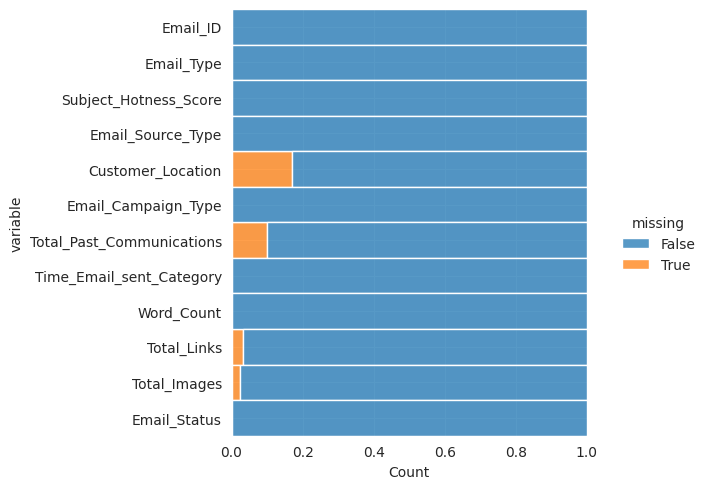

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25);

**Description**: Email campaign dataset have 68353 observations and 12 features. Clearly Email_Status is our target variable.

Features:

**Email Id**- It contains the email id's of the customers/individuals

**Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.

**Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.

**Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.

**Email Campaign Type** - The campaign type of the email.

**Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had.

**Customer Location** - Contains demographical data of the customer, the location where the customer resides.

**Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

**Word Count** - The number of words contained in the email.

**Total links** - Number of links in the email.

**Total Images** - Number of images in the email.

**Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

**Understanding Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.0,1.285094,0.451462,1.0,1.0,1.0,2.0,2.0
Subject_Hotness_Score,68353.0,1.095481,0.997578,0.0,0.2,0.8,1.8,5.0
Email_Source_Type,68353.0,1.456513,0.498109,1.0,1.0,1.0,2.0,2.0
Email_Campaign_Type,68353.0,2.272234,0.468680,1.0,2.0,2.0,3.0,3.0
Total_Past_Communications,61528.0,28.933250,12.536518,0.0,20.0,28.0,38.0,67.0
Time_Email_sent_Category,68353.0,1.999298,0.631103,1.0,2.0,2.0,2.0,3.0
Word_Count,68353.0,699.931751,271.719440,40.0,521.0,694.0,880.0,1316.0
Total_Links,66152.0,10.429526,6.383270,1.0,6.0,9.0,14.0,49.0
Total_Images,66676.0,3.550678,5.596983,0.0,0.0,0.0,5.0,45.0
Email_Status,68353.0,0.230934,0.497032,0.0,0.0,0.0,0.0,2.0


**Variables Description**

*   We can see that the **Email_Type and Email_Source_Type** have 1 values for 50% of the data **indicating skewness of the feature**.
*   Subject_Hotness_Score is also low till 75 percent compared to maximum value.
*   Upto 75 percent of data has 2 values for **Time_Email_sent_Category** indicating most of the **emails sent mostly in the evening**.
*   The values for **Total_Past_Communications columns** indicate **nearly normally distributed or has very less skewness**.
*   **Total_Links** column has maximum value 49 and 50% of column values are less than or equal to 9, similarly, maximum **Total_Images** column value is 45, and 50% of the column values are 0, this indicates **both the columns are highly skewed**.
*    Most of the email, 75%, have 0 as **Email_Status** indicating **most emails are unread**.








In [ ]:
df['Customer_Location'].value_counts()

G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64

Above result indicate that 'G' and 'E' locations received most of the emails.

In [ ]:
# Checking Unique Values for each variable.
unique_values_df = pd.DataFrame(index = list(df.columns))
list_values = []
for var in list(df.columns):
 list_values.append(list(df[var].unique().tolist()))
unique_values_df['Unique Values'] = list_values
unique_values_df['Unique Values Count'] = df.nunique()
unique_values_df


,Unique Values,Unique Values Count
Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353
Email_Type,"[1, 2]",2
Subject_Hotness_Score,"[2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ...",51
Email_Source_Type,"[2, 1]",2
Customer_Location,"[E, nan, B, C, G, D, F, A]",7
Email_Campaign_Type,"[2, 3, 1]",3
Total_Past_Communications,"[33.0, 15.0, 36.0, 25.0, 18.0, nan, 34.0, 21.0...",64
Time_Email_sent_Category,"[1, 2, 3]",3
Word_Count,"[440, 504, 962, 610, 947, 416, 116, 1241, 655,...",151
Total_Links,"[8.0, 5.0, 16.0, 4.0, 11.0, 6.0, 21.0, nan, 31...",37


**Observation:** from the above table, we understand that the columns 'Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status' are **categorical in nature**. We can change to object type for these categories.

##**Data Wrangling**

In [ ]:
# converting the columns into categorical columns.
for i in ['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status']:
  df[i] = df[i].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  object 
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  object 
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  object 
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  object 
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 6.3+ MB


**Handling missing values**


In [ ]:
# Function to replace nan values with an aggregate value
def fillingna(column):
  for i in column.items():
    if i[1] == 'mean':
      df[i[0]] = df[i[0]].fillna(df[i[0]].mean())
    elif i[1] == 'median':
      df[i[0]] = df[i[0]].fillna(df[i[0]].median())
    elif i[1] =='mode':
      df[i[0]] = df[i[0]].fillna(df[i[0]].mode()[0])
    else:
      print("Specify one of the aggregate methods - Mean, Mode, Median")


In [ ]:
#Repace nan values with mean, mode or median.

fillingna({'Total_Past_Communications':'mean', 'Total_Links':'median', 'Total_Images':'median', 'Customer_Location':'mode'})

In [ ]:
df.isna().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

**Manipulations done**:

*   Converted all the categorical columns into 'Object' type.
*   As the data of Total_Past_Communications feature is symmetrically distributed, we can use mean value for imputing missing values for this feature.
*   The features, Total_Links and Total_Images have outliers, imputing the missing values for these two continuous features having outliers with the median value as median is robust with outliers.



## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### **Univariate Analysis**

<Axes: xlabel='Email_Status', ylabel='count'>

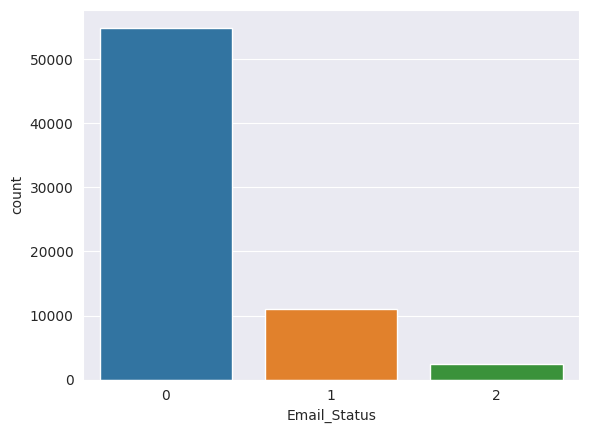

In [ ]:
# Chart - 1 visualization code  - plot of dependent variable
sns.countplot(data=df, x='Email_Status')

**Plot used**: Bar plot gives the count of each category of a feature.  
**Insight**: As we know 0, 1 and 2 indicate email is ignored, read or acknowledged. From the above plot it is clear that most of the emails are being ignored.

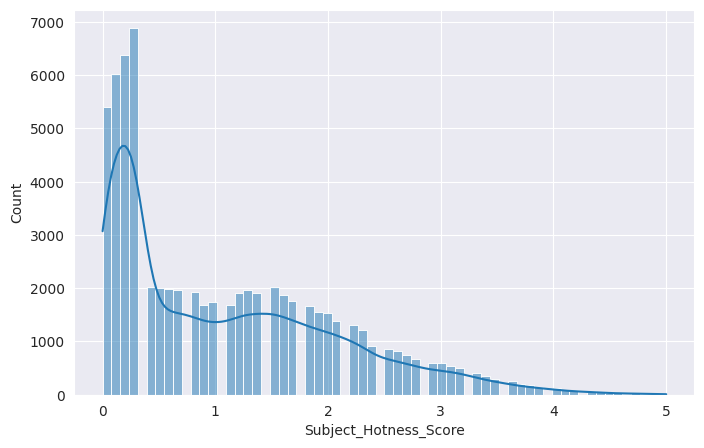

In [ ]:
# Chart - 2 visualization code  - histplot for numerical features

fig= plt.subplots(figsize = (8,5))
sns.histplot(data = df, x = df['Subject_Hotness_Score'], kde = True)
plt.show()

**Plot used:** The histplots are used for understanding the distribution of data of a feature.

**Insights:** From the plots it is clear that the Subject_Hotness_Score feature is right skewed.

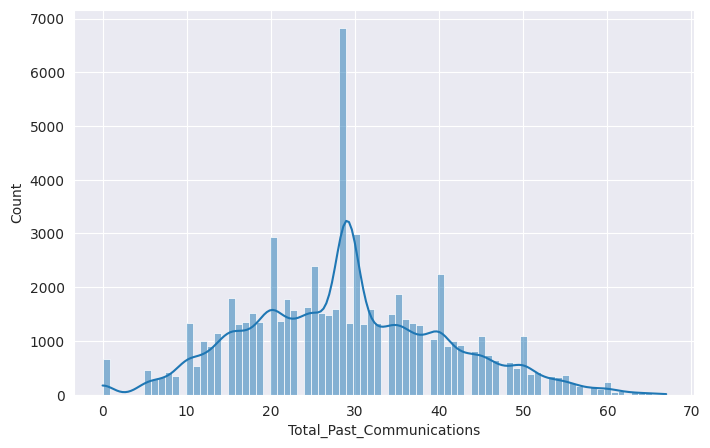

In [ ]:
# Chart - 3 visualization code  - histplot of

fig= plt.subplots(figsize = (8,5))
sns.histplot(data = df, x = df['Total_Past_Communications'], kde = True)
plt.show()

**Insights**: From the plot we can understand that the features Total_Communications is normally skewed with few outliers with values around 30.

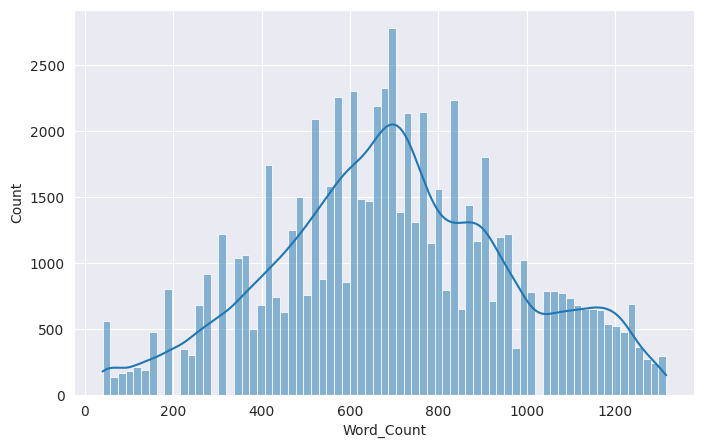

In [ ]:
# Chart - 4 visualization code  - histplot for numerical features

fig = plt.subplots(figsize = (8, 5))
sns.histplot(data = df, x = df['Word_Count'], kde = True)
plt.show()

**Insights**: From the plot we can understand that the Word_Count feature is mostly normally skewed.

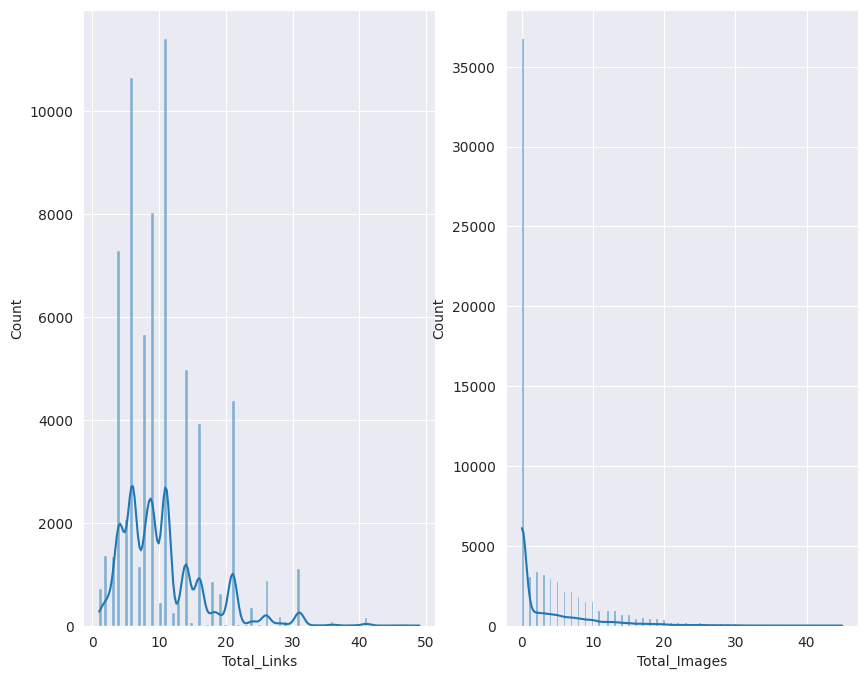

In [ ]:
# Chart - 5 Histplot for numerical features

fig, ax = plt.subplots(1, 2, figsize = (10,8))
sns.histplot(data = df, x = df['Total_Links'], ax=ax[0], kde = True)
sns.histplot(data = df, x = df['Total_Images'], ax=ax[1], kde = True)
plt.show()

**Insights**: From the plots we can understand that the features Total_links and Total_images are highly right skewed.

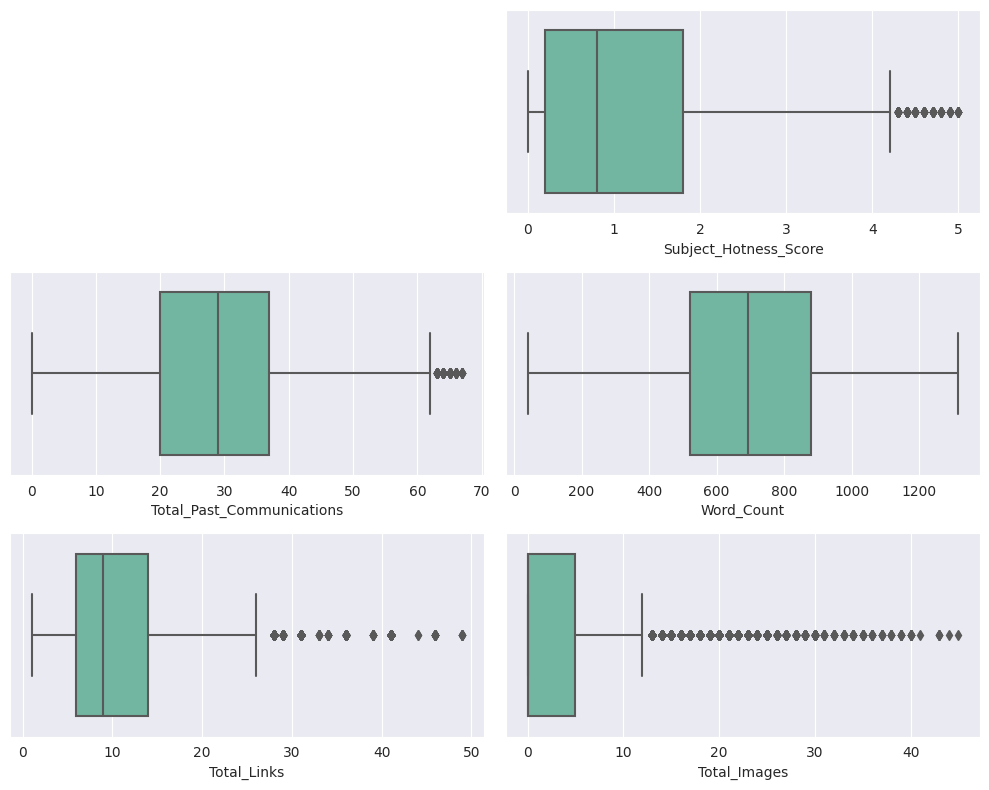

In [ ]:
# Chart - 6 visualization code - boxplots for numerical features
fig, ax= plt.subplots(nrows=3, ncols=2, figsize = (10,8))
ax=ax.flatten()
cnt=0
for i in df.describe(include='number').columns:
  cnt+=1
  sns.boxplot(data = df, x = df[i], ax=ax[cnt], palette = 'Set2')
[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]
plt.tight_layout()
plt.show()


**Plot used**: The boxplot is ideal for understanding the presence of outliers in the features.

**Insights found**: Total_Links and Total_Images have most outliers.

#### **Bivariate Analysis**

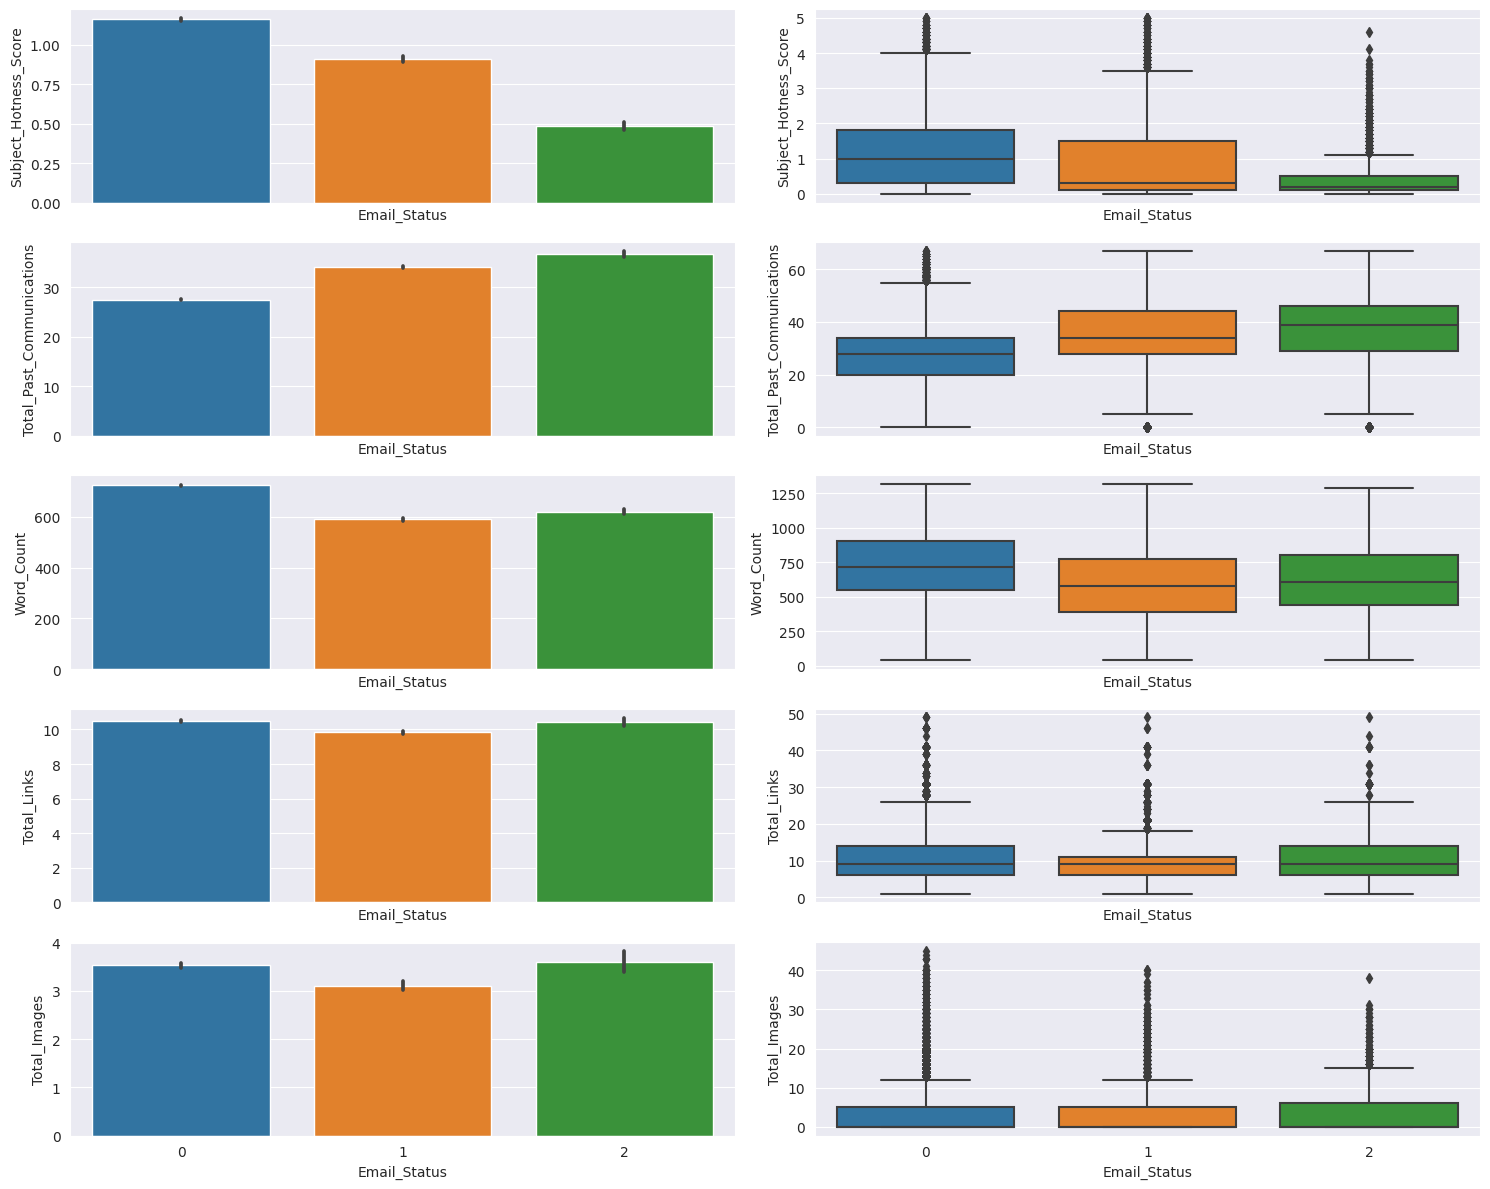

In [ ]:
# Chart - 7 visualization code

fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, figsize = (15,12))
ax=ax.flatten()
k=0
for i in df.describe(include='number').columns:
  sns.barplot(data = df, x ="Email_Status", y=i, ax=ax[k])
  k+=1
  sns.boxplot(data=df, x='Email_Status', y=i, ax=ax[k])
  k+=1
#[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]
plt.tight_layout()
plt.show()

**Plot used:** The bar plot is good for bivariate comparison. We can see the count of numerical features against email_status feature.

**Insights found:** From above plots we understand that subject hotness score is least for email_status 2 category indicating the acknowledgement of emails of less importance.

In [ ]:
#Defining the function for bar percentage calculations
def perc(ax, k):
  unique = len([x for x in df[k].unique()])
  bars = ax.patches
  for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

In [ ]:
def pieplots(i):
  fig, ax = plt.subplots(figsize = (8,5))
  color= ['skyblue', 'mediumseagreen', 'yellow','lightblue','grey', 'orange', 'red', 'aquamarine', 'green', 'lightblue', 'purple']
  data = df[i].value_counts()
  keys = list(df[i].unique())
  #plt.subplot(1,2,count)
  plt.pie(data, labels=keys, autopct="%1.1f%%", startangle=60, shadow=True, colors = color[0:len(keys)+1])
  plt.title(f"{i}")
  plt.show()

<Figure size 800x500 with 0 Axes>

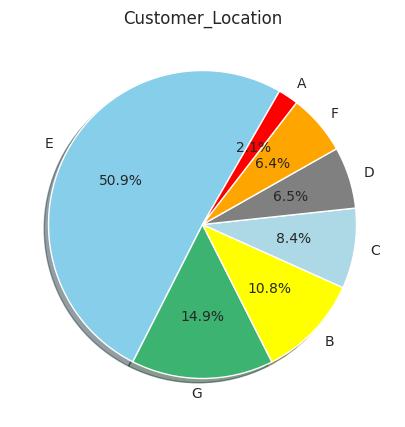

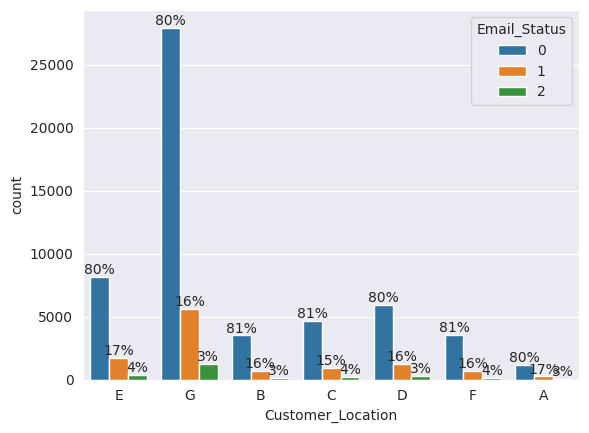

In [ ]:
# Chart - 8 visualization code - countplot for numerical features against email_score feature
fig= plt.figure(figsize = (8,5))
pieplots('Customer_Location')
ax = sns.countplot(x=df['Customer_Location'], hue=df["Email_Status"])
perc(ax, 'Customer_Location')

plt.show()

**Plot used**: pie plot and bar plot

**Insights found:** From the plots we can understand that the most of emails are from location 'E' and 'G', and 80% of the emails sent in all locations are unread.

<Figure size 800x500 with 0 Axes>

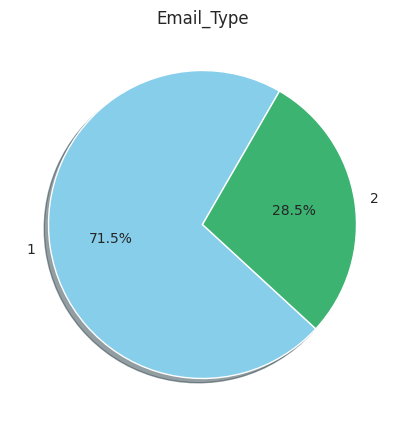

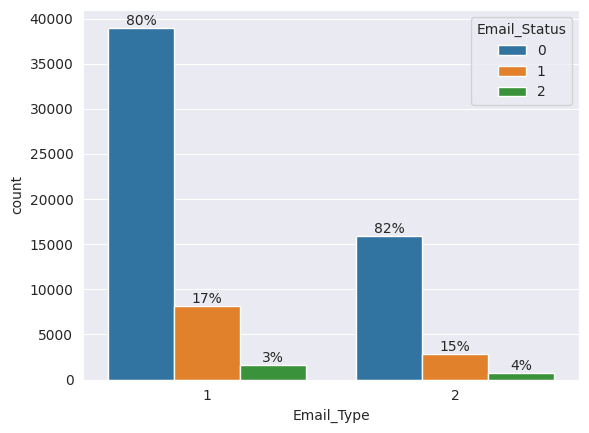

In [ ]:
# Chart - 9 visualization code
fig = plt.figure(figsize = (8,5));
pieplots('Email_Type');
ax=sns.countplot(data=df, x='Email_Type', hue='Email_Status');
perc(ax, 'Email_Type');

**Insights found:** From the plot, we observe that most of the emails are type 1 making 71.5%.

<Figure size 800x500 with 0 Axes>

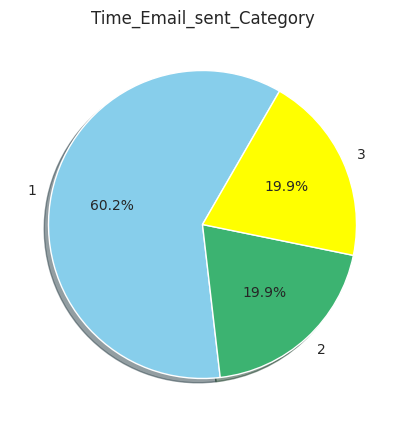

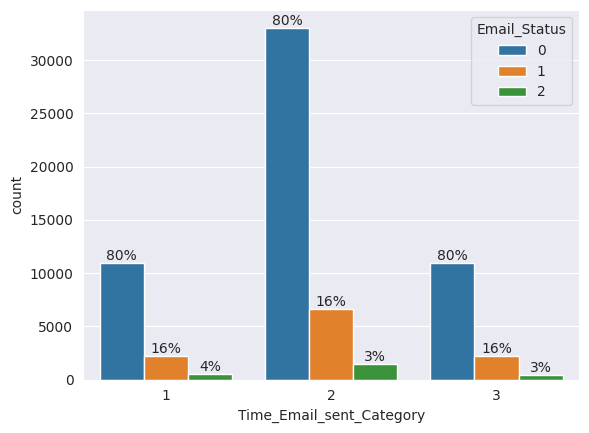

In [ ]:
# Chart - 10 visualization code
fig = plt.figure(figsize = (8,5))
pieplots('Time_Email_sent_Category')
ax=sns.countplot(data=df, x='Time_Email_sent_Category', hue='Email_Status')
perc(ax, 'Time_Email_sent_Category')

**Insights found:** Above chart indicate that most of the emails are sent in the morning time and we can also see that ackowledged emails percentage is higher in the morning time.

<Figure size 800x500 with 0 Axes>

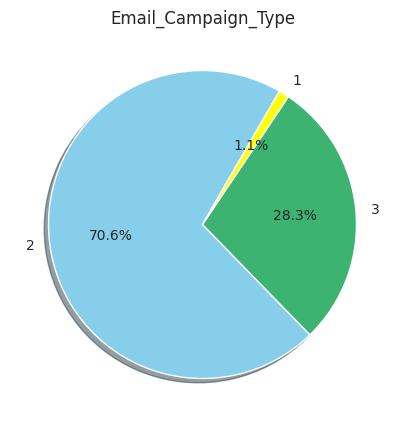

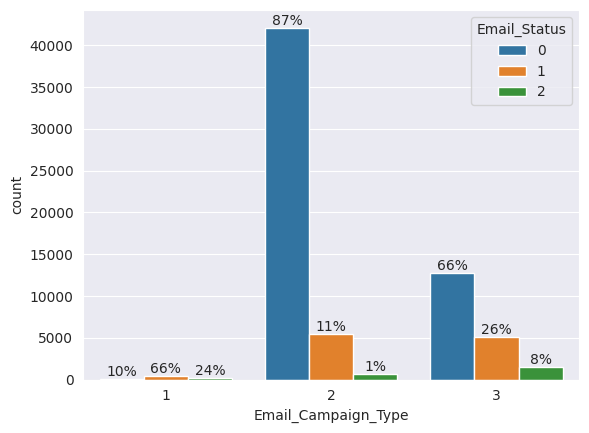

In [ ]:
# Chart - 11 visualization code
fig = plt.figure(figsize = (8,5))
pieplots('Email_Campaign_Type')
ax=sns.countplot(data=df, x='Email_Campaign_Type', hue='Email_Status')
perc(ax, 'Email_Campaign_Type')

**Insights:** From the charts, we can see most of the emails sent are of type 2 campaign and least are type 1 campaign.

<Figure size 800x500 with 0 Axes>

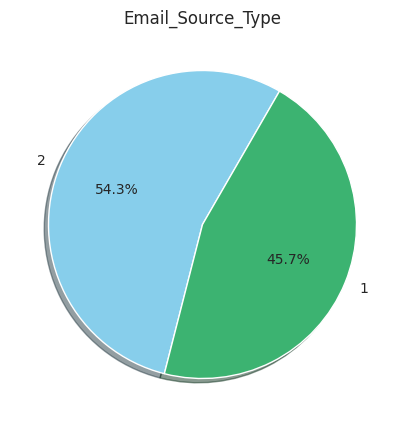

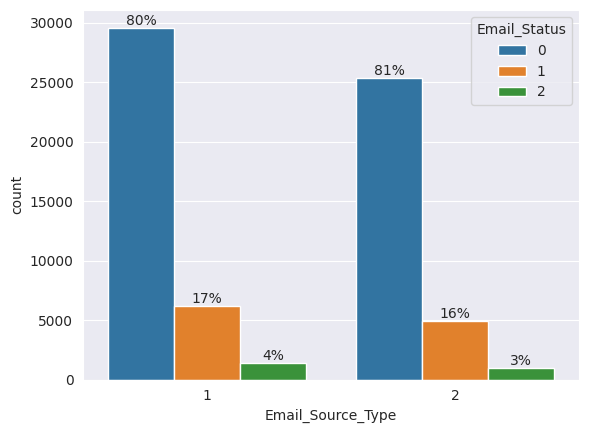

In [ ]:
# Chart - 12 visualization code
fig = plt.figure(figsize = (8,5))
pieplots('Email_Source_Type')
ax= sns.countplot(data=df, x='Email_Source_Type', hue='Email_Status')
perc(ax, 'Email_Source_Type')
plt.show()

**Insights:** We can see that the count of emails is almost similar for both the type with slightly higher for type 1.

<Figure size 1000x800 with 0 Axes>

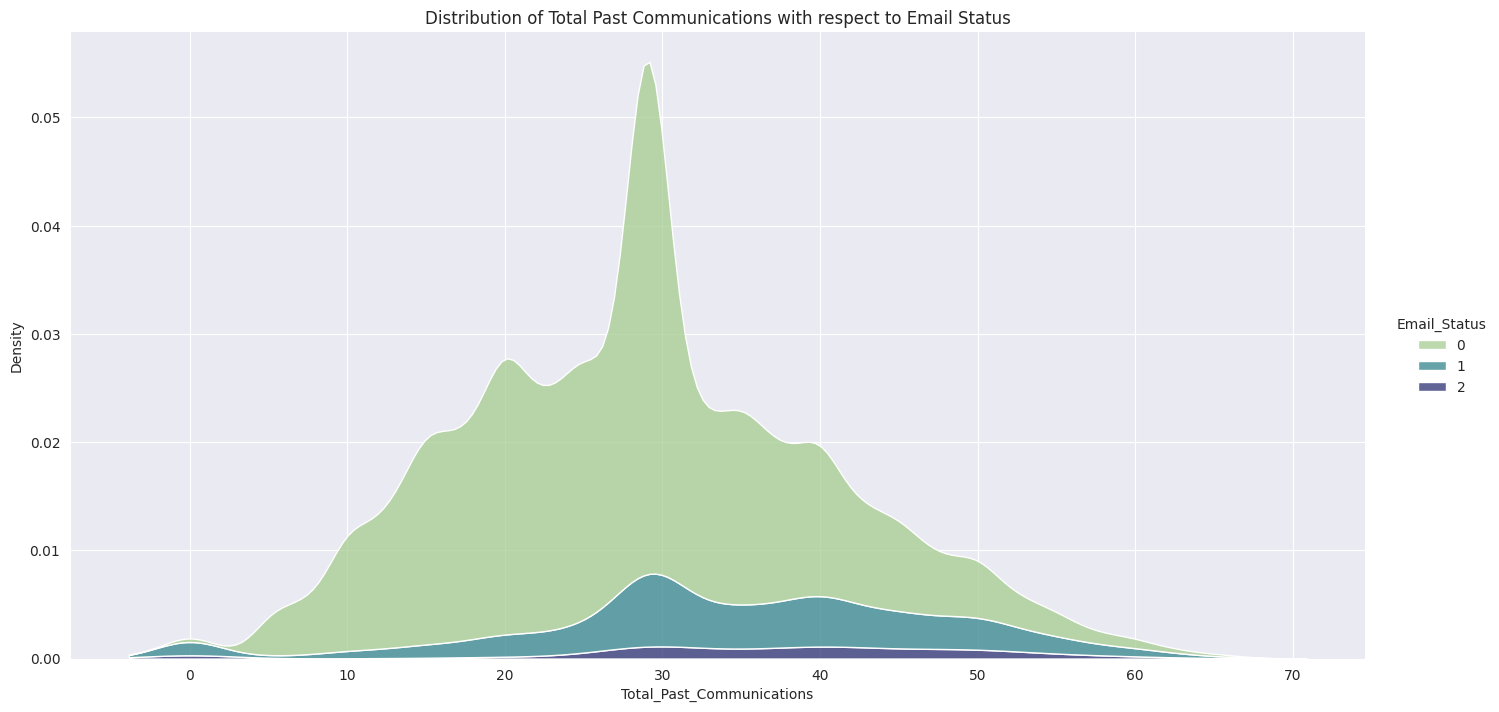

In [ ]:
#Chart - 13 - distplot for Total_Past_Communications w.r.t. Email_Status
fig = plt.figure(figsize=(10,8))
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = df,
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='crest');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()


**Insights Found:** from the plot its clear that the distribution of count of 'Total_Past_Communications' is linear.

<Axes: >

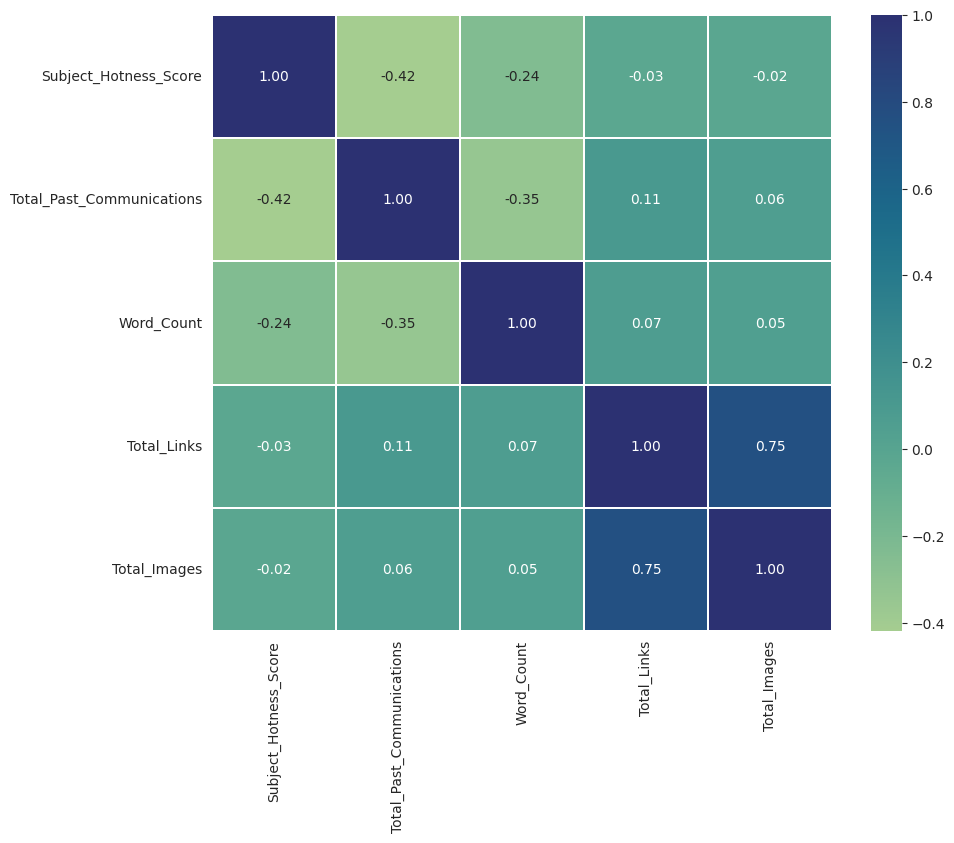

In [ ]:
#Chart - 14 - Correlation Heatmap
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap='crest', linewidths=0.1)

**Insights found:** From the plot, we can see that 'Subject_Hotness_Score' and 'Total_Past_Communications' are highly correlated.

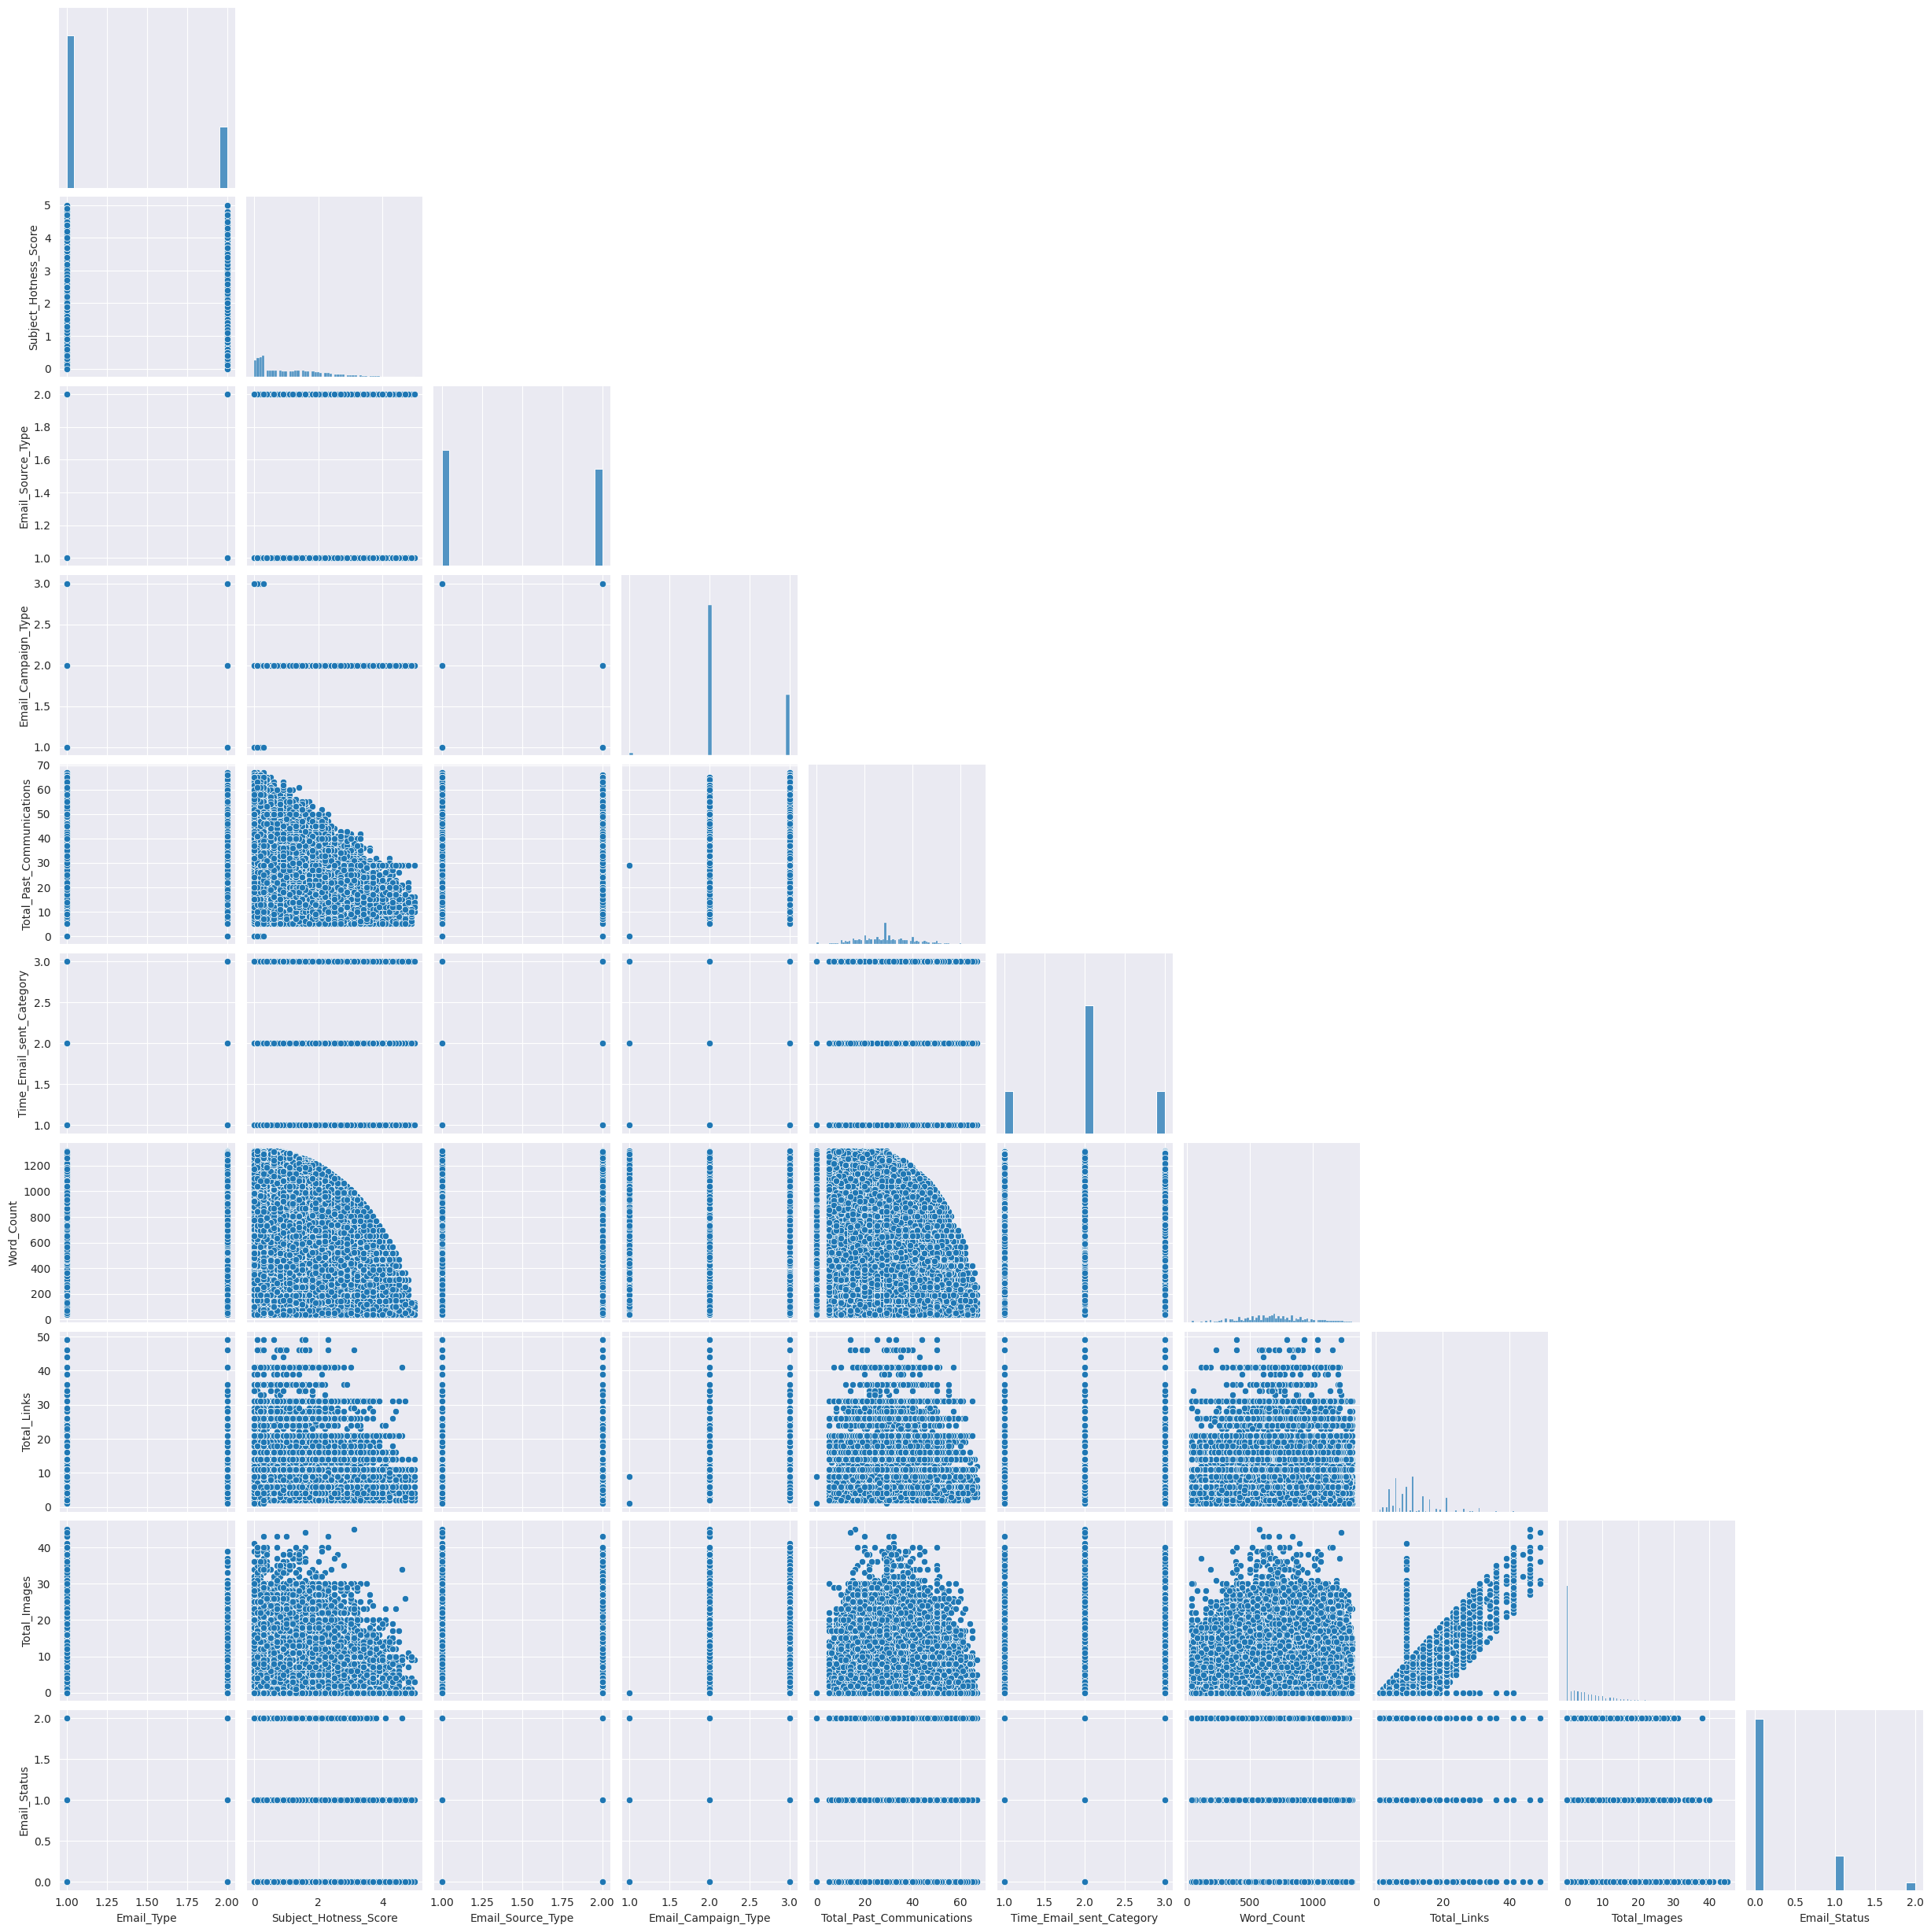

In [ ]:
# Chart - 15 - Pair Plot
# Pair Plot visualization code
sns.pairplot(df, corner=True, palette='crest')


**Plot used:** pair plot shows the bivariate distribution of the data.

**Insights found:**

## **Hypothesis Testing**

####**Hypothetical Statement - 1**

**Linear relationship between Subject_Hotness_Score and Total_Past_Communications**

**H0**: There is no linear relationship between Subject_Hotness_Score and Total_Past_Communications (H0: ρ = 0)

**H1**: There is a linear relationship between Subject_Hotness_Score and Total_Past_Communications (H1: ρ ≠ 0)

**Test Type** : Pearson's correlation test

**Significance Value** = 0.05


In [ ]:
data = df.copy()


In [ ]:
# perform parametric pearson's correlation test
r, p_value = stats.pearsonr(data['Subject_Hotness_Score'], data['Total_Past_Communications'])
print(f"P-value is {p_value}, Correlation value is {r}")
if p_value < 0.05:
    print("Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("Fail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")

P-value is 0.0, Correlation value is -0.41932000855776935
Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


**Why the specific statistical test?**: To check the corelation between two features - 'Subject_Hotness_Score' and 'Total_Past_Communications'.

**Observation**: The p-value obtain is highly significant, less than 0.05. hence, we reject the null hypothesis and conclude that the subject_Hotness_Score' and 'Total_Past_Communications are highly corelated.

####**Hypothetical Statement - 2**

**The Email_Type of the campaign will not have any significant impact on the Email_Status**

**H0**: There is no relationship between Email_Type and Email_Status (H0: B1 = 0)


**H1**: There is a relationship between Email_Type and Email_Status (H1: B1 ≠ 0)

**Test Type** : chi-square test

**Significance Value** = 0.05

In [ ]:
# Perform Statistical Test to obtain P-Value

# perform chi-square test of independence
stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['Email_Type'], df['Email_Status']))
print(f"The p-value is {p_value}\n Stat value is {stat}")

if p_value < 0.05:
    print("\nReject the null hypothesis - the Email_Type has a significant relation with the Email_Status")
else:
    print("\nFail to reject the null hypothesis - the Email_Type has no relation with the Email_Status")

The p-value is 1.2336491824483095e-12
 Stat value is 54.84208904771182

Reject the null hypothesis - the Email_Type has a significant relation with the Email_Status


Here, as the data is categoical, **Chi Square test** is used for getting p-value.

Chi Square-test best suits for comparing 2 categorical variables to understand the corelation between the features. From the above test, we conclude that there is a relationship between Email_Status and Email_Type features.


**Hypothetical Statement - 3**

**The Customer_Location will not have any significant impact on the Total_Links in the email:**

**H0**: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)

**H1**: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)

**Test Type** : ANOVA Test

**Significance Value** = 0.05

**Statistical test performance**

In [ ]:
# Perform Statistical Test to obtain P-Value
# perform ANOVA test
f_value, p_value = stats.f_oneway(df[df['Customer_Location'] == 'A']['Total_Links'],
                                  df[df['Customer_Location'] == 'B']['Total_Links'],
                                  df[df['Customer_Location'] == 'C']['Total_Links'],
                                  df[df['Customer_Location'] == 'D']['Total_Links'],
                                  df[df['Customer_Location'] == 'E']['Total_Links'],
                                  df[df['Customer_Location'] == 'F']['Total_Links'],
                                  df[df['Customer_Location'] == 'G']['Total_Links'])
print(f"the p-value is {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis - All Customer_Locations have equal Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - All Customer_Locations does not have equal Total_Links in the email")


the p-value is 0.37734613979511694
Fail to reject the null hypothesis - All Customer_Locations does not have equal Total_Links in the email


**Test used:** For this hypothesis, I used ANOVA (Analysis of Variance) test because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

**Insights found:** This test is used to determine if there are significant differences between the means of two or more groups. In this case, we have different locations (A,B,C,D,E,F,G) and we want to determine if there is a significant difference in the mean of Total_Links among these groups. ANOVA is appropriate for this case because the variable Total_Links is continuous and we want to compare the means of multiple groups.

##**Feature Engineering & Data Pre-processing**

In [ ]:
df.drop(['Email_ID'],axis=1,inplace=True)

In [ ]:
df.drop('Customer_Location',inplace=True,axis=1)

As both the coluns Email_ID and Customer_Location are not usefull with respect to Email_Status column, hence, dropping both the columns.


**Handling Outliers**

In [ ]:
# Handling Outliers & Outlier treatments

def check_outliers(df):
  outliers_percent=[]
  col_num = df.describe().columns
  outliers_count = []
  for i in col_num:
    Q1,Q3=df[i].quantile(0.25),df[i].quantile(0.75)
    IQR=Q3-Q1      # identify outliers
    lower,upper = Q1-1.5*IQR, Q3+1.5*IQR     #lower & upper percentile
    outliers = [x for x in df[i] if x < lower or x > upper]
    outliers_excluded_rows = [x for x in df[i] if x >= lower and x <= upper]
    outliers_percent.append((len(outliers)/(len(outliers)+len(outliers_excluded_rows)))*100)
    col = pd.Series(outliers_excluded_rows, name = i)  # getting features without outliers
    outliers_count.append(len(outliers))

  Outliers = pd.DataFrame({'Feature':list(col_num),'outliers_count': outliers_count, '% Of Outliers':outliers_percent})

  display(Outliers)

df1 = df.copy()
check_outliers(df1)

,Feature,outliers_count,% Of Outliers
0,Subject_Hotness_Score,247,0.361359
1,Total_Past_Communications,136,0.198967
2,Word_Count,0,0.000000
3,Total_Links,1608,2.352494
4,Total_Images,5585,8.170819


We can observe the percent of outliers for each numerical features. Total_Links and Total_Images has highest percent of outliers. Before we remove the outliers in these columns, lets check percentage for majority and minority class of Email_Status feature (Majority being Status = 0 and Minority being status 1 & 2 as per our visualisation chart-1).

outliers rows count 6096


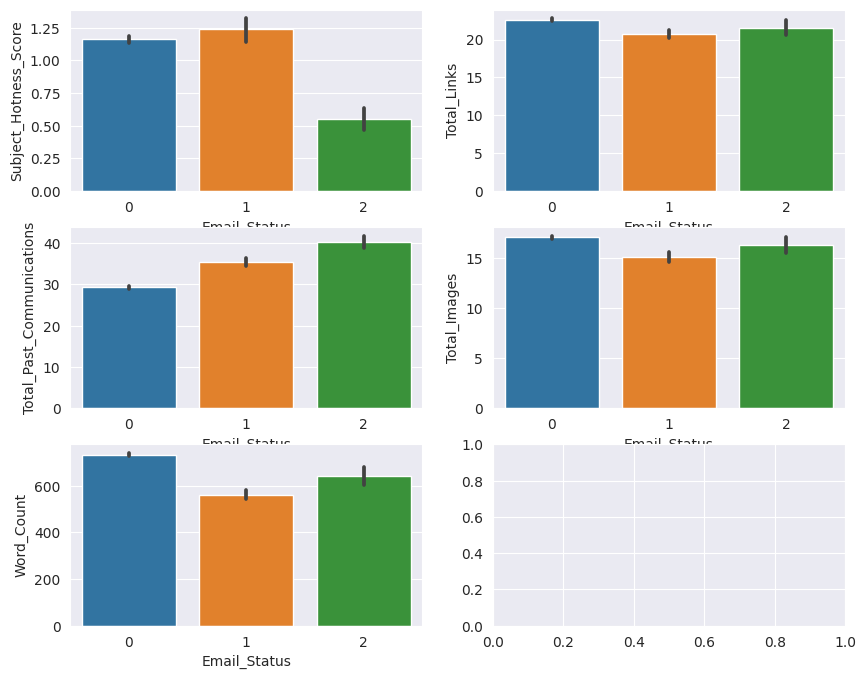

In [ ]:
df2 = df.copy()
cols = df2.describe().columns
q1 = df2[cols].quantile(0.25)
q3 = df2[cols].quantile(0.75)
iqr = q3 - q1
min, max = (q1 - 1.5 * iqr), (q3 + 1.5 * iqr)
new_df2 = df2[((df2[cols] < min)|(df2[cols] > max)).any(axis=1)]

print(f"outliers rows count {new_df2.shape[0]}")


fig, axes = plt.subplots(3, 2, figsize=(10,8))
axe = axes.T.flatten()
cnt = 0
for i in new_df2.describe().columns:
  sns.barplot(data = new_df2, x=new_df2['Email_Status'], y=new_df2[i], ax=axe[cnt], orient='v')
  cnt+=1

plt.show()


In [ ]:
outliers_percentage = ((len(new_df2.loc[new_df2['Email_Status']==0])/(len(df.loc[df['Email_Status']==0])))*100)
print(f"Percent of outliers for majority class (Email_Status = 0): {outliers_percentage}")

Percent of outliers for majority class (Email_Status = 0): 9.158915927995485


In [ ]:
outliers_percentage_minor = ((len(new_df2.loc[new_df2['Email_Status']!=0])/(len(df.loc[df['Email_Status']!=0])))*100)
print(f"Percent of outliers for minority class (Email_Status -> 1&2): {outliers_percentage_minor}")

Percent of outliers for minority class (Email_Status -> 1&2): 7.933194154488518


**Method used:** The interquartile technique is used to detect the percentage of outliers in the dataset.

**Observation**: From above results we see that more than 5% of the data are outliers with respect to majority(Email_Status=0) and minority(Email_Status=1,2) Email_Status. **Hence, we will not remove any outliers for this dataset.**


**Categorical Encoding**

In [ ]:
df.select_dtypes('object').columns


Index(['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type',
       'Time_Email_sent_Category', 'Email_Status'],
      dtype='object')

In [ ]:
# Encode your categorical columns
df_encoded = df.copy()

# one hot encoding
df_encoded=pd.get_dummies(df, columns=[x for x in df.select_dtypes('object').columns if x !='Email_Status'], drop_first=True, sparse=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype           
---  ------                      --------------  -----           
 0   Subject_Hotness_Score       68353 non-null  float64         
 1   Total_Past_Communications   68353 non-null  float64         
 2   Word_Count                  68353 non-null  int64           
 3   Total_Links                 68353 non-null  float64         
 4   Total_Images                68353 non-null  float64         
 5   Email_Status                68353 non-null  object          
 6   Email_Type_2                68353 non-null  Sparse[uint8, 0]
 7   Email_Source_Type_2         68353 non-null  Sparse[uint8, 0]
 8   Email_Campaign_Type_2       68353 non-null  Sparse[uint8, 0]
 9   Email_Campaign_Type_3       68353 non-null  Sparse[uint8, 0]
 10  Time_Email_sent_Category_2  68353 non-null  Sparse[uint8, 0]
 11  Time_Email_sent_Category_3  

In [ ]:
df_encoded.columns

Index(['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count',
       'Total_Links', 'Total_Images', 'Email_Status', 'Email_Type_2',
       'Email_Source_Type_2', 'Email_Campaign_Type_2', 'Email_Campaign_Type_3',
       'Time_Email_sent_Category_2', 'Time_Email_sent_Category_3'],
      dtype='object')

The **one hot encoding** is done  using get.dummies method for the categorical features. The categorical value has no precedence over other values, hence, we use One hot encoding here.


**Feature Manipulation**

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#checking the multicolinearity between independent variables
def vif_calc(data):
# Select only numeric columns for VIF calculation
  numeric_columns = df_encoded[df_encoded.columns[1:]].select_dtypes(include=['int', 'float'])
# Calculate VIF for each feature
  vif_data = pd.DataFrame()
  vif_data["feature"] = numeric_columns.columns
  vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i)
                   for i in range(len(numeric_columns.columns))]
  vif_data['VIF'] = round(vif_data['VIF'], 2)
  print(vif_data)

vif_calc(df_encoded)

                     feature   VIF
0  Total_Past_Communications  3.92
1                 Word_Count  3.89
2                Total_Links  8.10
3               Total_Images  3.10


**Observation**: We can see that 'Total_Links' has high VIF indicating higher correlation. We can combine Total_Links and Total_Images columns to one column to reduce the multicolinearity between the features.

In [ ]:
#Adding Total_Images and Total_Links features
df_encoded['Total_Links_Images'] = df_encoded['Total_Images'] + df_encoded['Total_Links']

# Dropping both the columns
df_encoded.drop(columns= ['Total_Images', 'Total_Links'], inplace=True)

#checking the vif after changes in features
vif_calc(df_encoded)


                     feature   VIF
0  Total_Past_Communications  3.41
1                 Word_Count  3.40
2         Total_Links_Images  2.56


**Data Transformation**

Not required.

**Data Splitting**

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = df_encoded.drop(columns=['Email_Status'])
y = df_encoded['Email_Status']
y = y.astype('int')
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(51264, 10)
(17089, 10)


In [ ]:
x_test.columns

Index(['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count',
       'Email_Type_2', 'Email_Source_Type_2', 'Email_Campaign_Type_2',
       'Email_Campaign_Type_3', 'Time_Email_sent_Category_2',
       'Time_Email_sent_Category_3', 'Total_Links_Images'],
      dtype='object')

I have used 75% data for train and 25% for test set.

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
x_test.columns

Index(['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count',
       'Email_Type_2', 'Email_Source_Type_2', 'Email_Campaign_Type_2',
       'Email_Campaign_Type_3', 'Time_Email_sent_Category_2',
       'Time_Email_sent_Category_3', 'Total_Links_Images'],
      dtype='object')

Which method have you used to scale you data and why?

Since all of them has almost normal distribution, hence applied standard scaler to scale the features.

**Handling Data Imbalance**

In [ ]:
# use undersampling to eliminate data imbalance
rus = RandomUnderSampler(random_state = 42, replacement=True)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# use oversampling to eliminate data imbalance
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

##**ML Model Implementation**

In [ ]:
# Defining the function for metrix calculation

All_metrics = {'Train_Accuracy':[], 'Test_Accuracy':[], 'Train_Precision': [], 'Train_Precision':[], 'Test_Precision':[],
               'Train_Recall': [], 'Test_Recall': [], 'Train_F1_Score':[], 'Test_F1_Score':[], 'Train_ROC_AUC':[], 'Test_ROC_AUC':[]}
Model_names = []

def metrices(df_encoded, X_train, y_train, X_test, y_test, Model_name):

  #Making predictions smote
  y_pred_train = df_encoded.predict(X_train)
  y_pred_test = df_encoded.predict(X_test)

  # Probabilities of train and test data
  train_proba = df_encoded.predict_proba(X_train)
  test_proba = df_encoded.predict_proba(X_test)


# creating lists for the matrix scores for all models

  metrics_dict = {}

  metrics_dict['Train_Accuracy'] = accuracy_score(y_train, y_pred_train) * 100
  metrics_dict['Test_Accuracy'] = accuracy_score(y_test, y_pred_test) * 100
  metrics_dict['Train_Precision'] = precision_score(y_train, y_pred_train, average='weighted') * 100
  metrics_dict['Test_Precision'] = precision_score(y_test, y_pred_test, average='weighted') * 100
  metrics_dict['Train_Recall'] = recall_score(y_train, y_pred_train, average='weighted') * 100
  metrics_dict['Test_Recall'] = recall_score(y_test, y_pred_test, average='weighted') * 100
  metrics_dict['Train_F1_Score'] = f1_score(y_train, y_pred_train, average='weighted') * 100
  metrics_dict['Test_F1_Score'] = f1_score(y_test, y_pred_test, average='weighted') * 100
  metrics_dict['Train_ROC_AUC'] = roc_auc_score(y_train, train_proba, average='weighted', multi_class='ovr')
  metrics_dict['Test_ROC_AUC'] = roc_auc_score(y_test, test_proba, average='weighted', multi_class='ovr')
  metrics_dict['Confusion_Matrix_train'] = confusion_matrix(y_train,y_pred_train)
  metrics_dict['Confusion Matrix'] = confusion_matrix(y_test,y_pred_test)

# print the results of model evaluation
  print(f"Metrics of {Model_name}\nTraining Data            |        Test Data")
  print(f"Accuracy  : {round(metrics_dict['Train_Accuracy'], 3)} %     |     Accuracy  : {round(metrics_dict['Test_Accuracy'], 3)} %")
  print(f"Precision : {round(metrics_dict['Train_Precision'], 3)} %     |     Precision : {round(metrics_dict['Test_Precision'], 3)} %")
  print(f"Recall    : {round(metrics_dict['Train_Recall'], 3)} %     |     Recall    : {round(metrics_dict['Test_Recall'], 3)} %")
  print(f"F1 Score  : {round(metrics_dict['Train_F1_Score'], 3)} %     |     F1 Score  : {round(metrics_dict['Test_F1_Score'], 3)} %")
  print(f"ROC AUC   : {round(metrics_dict['Train_ROC_AUC'], 3)} %      |     ROC AUC   : {round(metrics_dict['Test_ROC_AUC'], 3)}%\n")
# confusion matrix
  cf_matrix_train = confusion_matrix(y_pred_train, y_train)
  cf_matrix_test = confusion_matrix(y_pred_test, y_test)
  print(f"Confusion matrix for train data: \n{cf_matrix_train}\n\nConfusion matrix for test data: \n{cf_matrix_test}\n")

  # plot ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_proba[:,i], pos_label=i)
  plt.figure(figsize=(10, 5))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Ignored vs Others'+" AUC="+str(round(metrics_dict['Test_ROC_AUC'], 6)))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Read vs Others'+" AUC="+str(round(metrics_dict['Test_ROC_AUC'], 6)))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Acknowledged vs Others'+" AUC="+str(round(metrics_dict['Test_ROC_AUC'], 6)))
  plt.title(f"ROC curve - {Model_name}")
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.legend(loc=4)
  plt.show()

  Model_names.append(Model_name)
  for key in All_metrics.keys():
    All_metrics[key].append(metrics_dict[key])

###**ML Model 1 - Logistic Regression**

Metrics of Logistic Regression RUS
Training Data            |        Test Data
Accuracy  : 53.185 %     |     Accuracy  : 61.741 %
Precision : 51.701 %     |     Precision : 77.146 %
Recall    : 53.185 %     |     Recall    : 61.741 %
F1 Score  : 50.89 %     |     F1 Score  : 67.599 %
ROC AUC   : 0.718 %      |     ROC AUC   : 0.76%

Confusion matrix for train data: 
[[1231  570  324]
 [ 261  428  263]
 [ 308  802 1213]]

Confusion matrix for test data: 
[[9552  863  106]
 [1959  621   89]
 [2240 1281  378]]



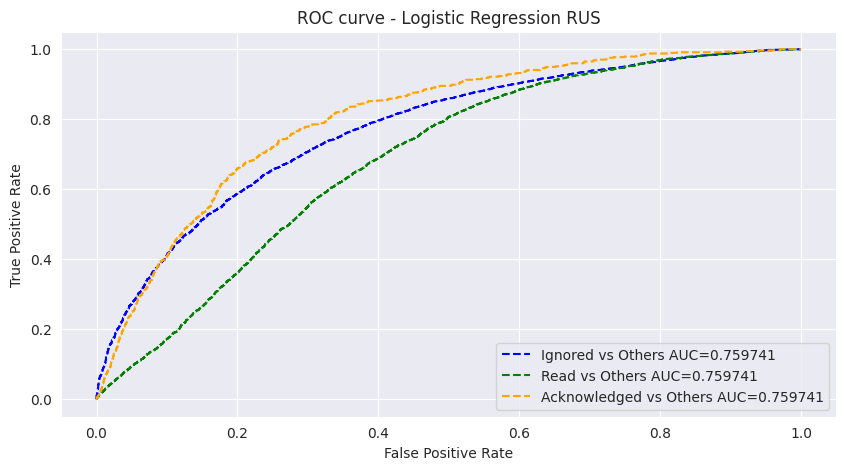

Metrics of Logistic Regression SMOTE
Training Data            |        Test Data
Accuracy  : 53.757 %     |     Accuracy  : 61.583 %
Precision : 52.46 %     |     Precision : 77.246 %
Recall    : 53.757 %     |     Recall    : 61.583 %
F1 Score  : 51.136 %     |     F1 Score  : 67.51 %
ROC AUC   : 0.722 %      |     ROC AUC   : 0.761%

Confusion matrix for train data: 
[[28549 12265  7398]
 [ 5448  9265  5179]
 [ 7193 19660 28613]]

Confusion matrix for test data: 
[[9549  855  105]
 [1819  584   77]
 [2383 1326  391]]



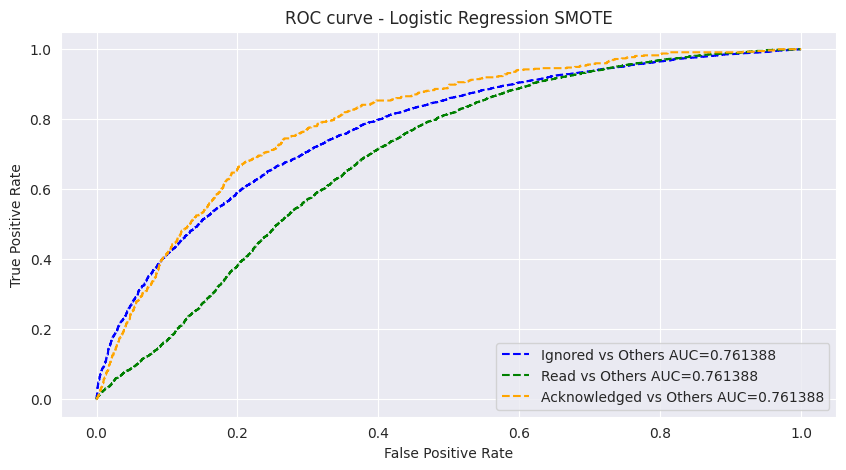

In [ ]:
# Fit the Algorithm for RUS

log_reg_rus = LogisticRegression(multi_class='multinomial', class_weight='balanced')
parameters = {'solver':['lbfgs', 'newton-cg', 'saga'], 'C':[0.01, 0.1, 1], 'max_iter':[50, 80, 100]}

# train data with logistic regression on random undersampling
log_reg_rus = RandomizedSearchCV(log_reg_rus, parameters, cv=5, n_iter=10)
log_reg_rus.fit(X_train_rus, y_train_rus)

# model evaluation
metrices(log_reg_rus, X_train_rus, y_train_rus, X_test, y_test, 'Logistic Regression RUS')

# Fit the Algorithm for SMOTE
log_reg_smote = LogisticRegression(multi_class='multinomial', class_weight='balanced')
parameters = {'solver':['lbfgs', 'newton-cg', 'saga'], 'C':[0.01, 0.1, 1], 'max_iter':[50, 80, 100]}

# train data with logistic regression on random undersampling
log_reg_smote = RandomizedSearchCV(log_reg_smote, parameters, cv=5, n_iter=10)
log_reg_smote.fit(X_train_smote, y_train_smote)

# model evaluation
metrices(log_reg_smote, X_train_smote, y_train_smote, X_test, y_test, 'Logistic Regression SMOTE')

Explain the ML Model used and it's performance using Evaluation metric Score Chart.

###**ML Model 2 - Decision Tree Classification**

Metrics of Decision Tree RUS
Training Data            |        Test Data
Accuracy  : 49.889 %     |     Accuracy  : 66.516 %
Precision : 48.068 %     |     Precision : 73.747 %
Recall    : 49.889 %     |     Recall    : 66.516 %
F1 Score  : 41.574 %     |     F1 Score  : 68.053 %
ROC AUC   : 0.654 %      |     ROC AUC   : 0.665%

Confusion matrix for train data: 
[[1432  924  553]
 [  31   58   43]
 [ 337  818 1204]]

Confusion matrix for test data: 
[[10939  1416   185]
 [  200    54    14]
 [ 2612  1295   374]]



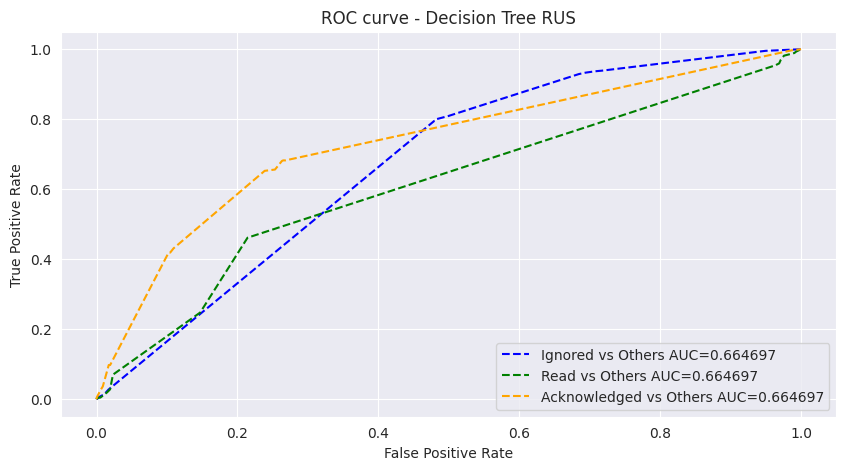

Metrics of Decision Tree SMOTE
Training Data            |        Test Data
Accuracy  : 57.703 %     |     Accuracy  : 64.217 %
Precision : 56.885 %     |     Precision : 78.484 %
Recall    : 57.703 %     |     Recall    : 64.217 %
F1 Score  : 56.6 %     |     F1 Score  : 69.842 %
ROC AUC   : 0.761 %      |     ROC AUC   : 0.743%

Confusion matrix for train data: 
[[29021  9905  3760]
 [ 6006 13909  9056]
 [ 6163 17376 28374]]

Confusion matrix for test data: 
[[9736  849  111]
 [1991  959  183]
 [2024  957  279]]



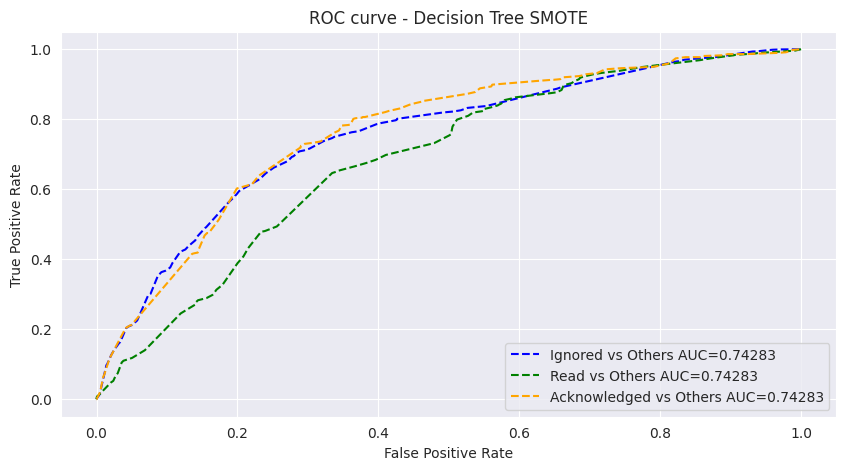

In [ ]:
# Model for decision tree classifier for RUS
decision_tree_rus = DecisionTreeClassifier()
parameters = {'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 20, 100],
              'max_features': ['auto', 'sqrt', 'log2']}
# train data with decision tree on random undersampling
dt= RandomizedSearchCV(decision_tree_rus, parameters, cv=5, n_iter=10)
dt.fit(X_train_rus, y_train_rus)
# model evaluation
metrices(dt, X_train_rus, y_train_rus, X_test, y_test, 'Decision Tree RUS')


# Model - Decision tree classifier for SMOTE
decision_tree_smote = DecisionTreeClassifier()
parameters = {'max_depth': [5, 10, None],
              'min_samples_leaf': [1, 2, 5],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 20, 100],
              'max_features': ['auto', 'sqrt', 'log2']}
# train data with decision tree on random undersampling
dt_smote= RandomizedSearchCV(decision_tree_smote, parameters, cv=5, n_iter=10)
dt_smote.fit(X_train_smote, y_train_smote)
# model evaluation
metrices(dt_smote, X_train_smote, y_train_smote, X_test, y_test, 'Decision Tree SMOTE')

###**ML Model 3 - Random Forest Classifier**

Metrics of Random Forest RUS
Training Data            |        Test Data
Accuracy  : 61.981 %     |     Accuracy  : 63.912 %
Precision : 62.648 %     |     Precision : 77.615 %
Recall    : 61.981 %     |     Recall    : 63.912 %
F1 Score  : 60.597 %     |     F1 Score  : 69.216 %
ROC AUC   : 0.82 %      |     ROC AUC   : 0.766%

Confusion matrix for train data: 
[[1373  474  318]
 [ 171  673  181]
 [ 256  653 1301]]

Confusion matrix for test data: 
[[9910  876  107]
 [1818  644   98]
 [2023 1245  368]]



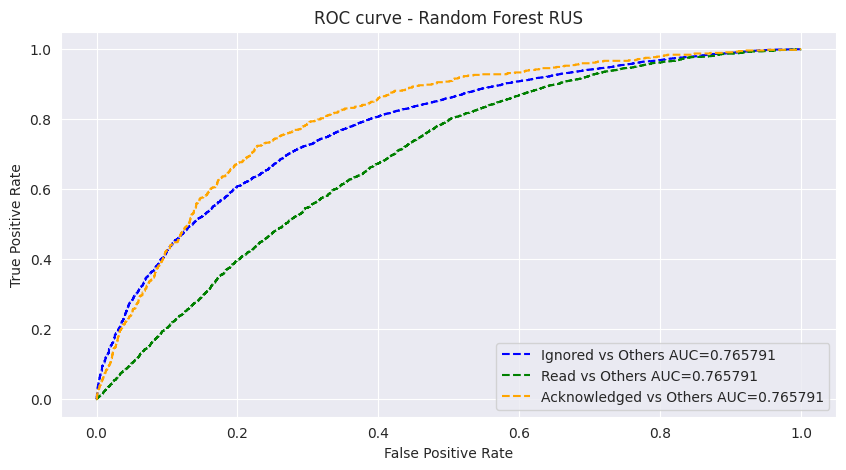

In [ ]:
# Model - Randomforest Classifier - RUS
random_forest_rus = RandomForestClassifier()
parameters = {'max_depth': [10],                           # 5, None],
              'min_samples_leaf': [2],                     #1, 5],
              'min_samples_split': [5],                   #2, 10],
              'max_leaf_nodes': [100],                     #5, 20],
              'max_features': ['sqrt']},                   # 'auto', 'log2']}
# train data with random forest on random undersampling
rf_rus = RandomizedSearchCV(random_forest_rus, parameters, cv=5, n_iter=10)
rf_rus.fit(X_train_rus, y_train_rus)
metrices(rf_rus, X_train_rus, y_train_rus, X_test, y_test, 'Random Forest RUS')



Metrics of Random Forest SMOTE
Training Data            |        Test Data
Accuracy  : 61.201 %     |     Accuracy  : 67.956 %
Precision : 60.37 %     |     Precision : 77.668 %
Recall    : 61.201 %     |     Recall    : 67.956 %
F1 Score  : 59.548 %     |     F1 Score  : 71.94 %
ROC AUC   : 0.799 %      |     ROC AUC   : 0.768%

Confusion matrix for train data: 
[[31430 11187  5535]
 [ 5588 14055  5514]
 [ 4172 15948 30141]]

Confusion matrix for test data: 
[[10476  1017   134]
 [ 1873   859   161]
 [ 1402   889   278]]



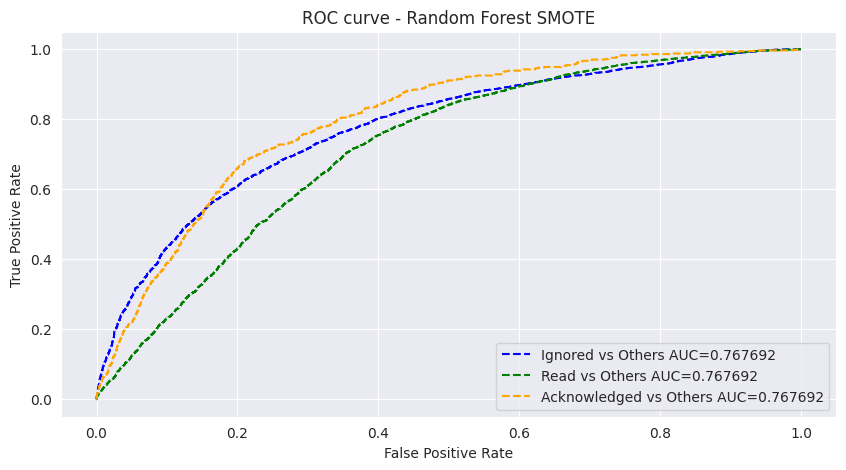

In [ ]:
# Model - Randomforest Classifier - SMOTE
random_forest_smote = RandomForestClassifier()
parameters = {'max_depth': [10],                           # 5, None],
              'min_samples_leaf': [1],                     #2, 5],
              'min_samples_split': [10],                   #2, 5],
              'max_leaf_nodes': [100],                     #5, 20],
              'max_features': ['auto']},                   # 'sqrt', 'log2']}

# train data with random forest on random undersampling
rf_smote = RandomizedSearchCV(random_forest_smote, parameters, cv=5, n_iter=10)
rf_smote.fit(X_train_smote, y_train_smote)
# model evaluation
metrices(rf_smote, X_train_smote, y_train_smote, X_test, y_test, 'Random Forest SMOTE')

###**ML Model 4 - XG Boost classifier**

Metrics of XG Boost RUS
Training Data            |        Test Data
Accuracy  : 81.222 %     |     Accuracy  : 61.589 %
Precision : 81.807 %     |     Precision : 77.688 %
Recall    : 81.222 %     |     Recall    : 61.589 %
F1 Score  : 81.14 %     |     F1 Score  : 67.691 %
ROC AUC   : 0.946 %      |     ROC AUC   : 0.756%

Confusion matrix for train data: 
[[1581  202  199]
 [  76 1300   96]
 [ 143  298 1505]]

Confusion matrix for test data: 
[[9407  807   95]
 [2271  775  135]
 [2073 1183  343]]



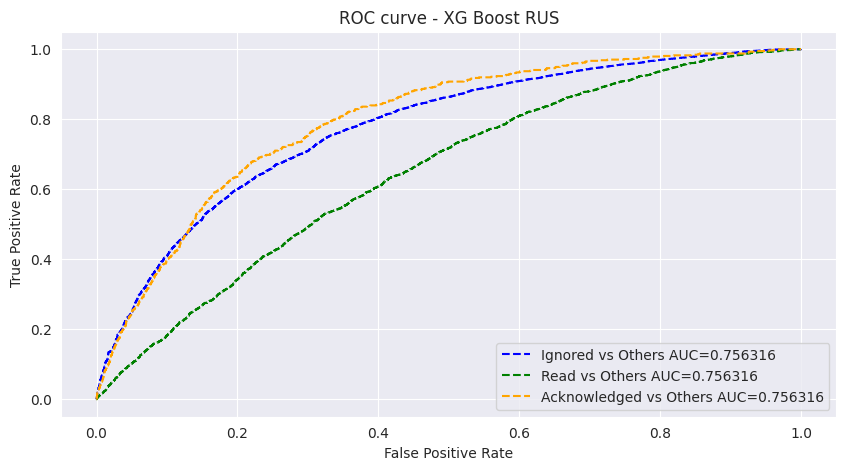

In [ ]:
# Model -  XGBoost classifier for RUS
xgboost_rus = XGBClassifier(objective='multi:softmax', verbosity=0)
parameters = {'max_depth': [10],                      #2, 5],
              'learning_rate': [0.05],                #0.1, 0.2],
              'min_child_weight': [2],                #1, 5],
              'gamma': [0.3],                         #0, 0.1],
              'colsample_bytree': [0.5]}              #0.3, 0.7]}
# train data with XGBoost on random undersampling
xgb_rus = RandomizedSearchCV(xgboost_rus, parameters, cv=5, n_iter=10)
xgb_rus.fit(X_train_rus, y_train_rus)

# model evaluation
metrices(xgb_rus, X_train_rus, y_train_rus, X_test, y_test, 'XG Boost RUS')



Metrics of XG Boost SMOTE
Training Data            |        Test Data
Accuracy  : 82.057 %     |     Accuracy  : 78.647 %
Precision : 82.24 %     |     Precision : 75.789 %
Recall    : 82.057 %     |     Recall    : 78.647 %
F1 Score  : 81.483 %     |     F1 Score  : 76.927 %
ROC AUC   : 0.942 %      |     ROC AUC   : 0.771%

Confusion matrix for train data: 
[[38709  6476  1576]
 [ 1996 26113  3038]
 [  485  8601 36576]]

Confusion matrix for test data: 
[[12617  1827   313]
 [  938   755   192]
 [  196   183    68]]



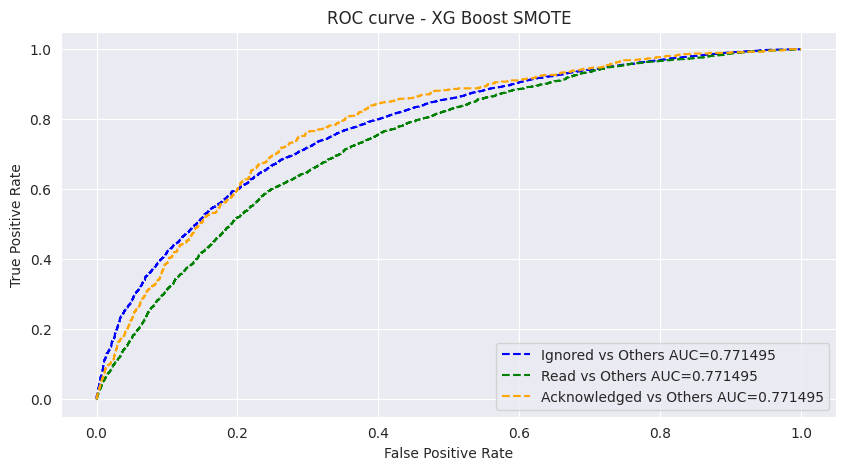

In [ ]:

# Model -  XGBoost classifier for SMOTE
xgboost_smote = XGBClassifier(objective='multi:softmax', verbosity=0)
parameters = {'max_depth': [10],                        #2, 5],
              'learning_rate': [0.1],                   #0.05, 0.2],
              'min_child_weight': [2],                  #1, 5],
              'gamma': [0.3],                           #0, 0.1],
              'colsample_bytree': [0.5]}                #0.3, 0.7]}
# train data with XGBoost on random undersampling
xgb_smote = RandomizedSearchCV(xgboost_smote, parameters, cv=5, n_iter=10)
xgb_smote.fit(X_train_smote, y_train_smote)

# model evaluation
metrices(xgb_smote, X_train_smote, y_train_smote, X_test, y_test, 'XG Boost SMOTE')

###**ML Model 5 - KNN with Hyperparameter Tuning**

Metrics of KNN RUS
Training Data            |        Test Data
Accuracy  : 99.944 %     |     Accuracy  : 56.896 %
Precision : 99.945 %     |     Precision : 77.461 %
Recall    : 99.944 %     |     Recall    : 56.896 %
F1 Score  : 99.944 %     |     F1 Score  : 64.126 %
ROC AUC   : 1.0 %      |     ROC AUC   : 0.729%

Confusion matrix for train data: 
[[1800    0    0]
 [   0 1800    3]
 [   0    0 1797]]

Confusion matrix for test data: 
[[8472  732   81]
 [2906  931  172]
 [2373 1102  320]]



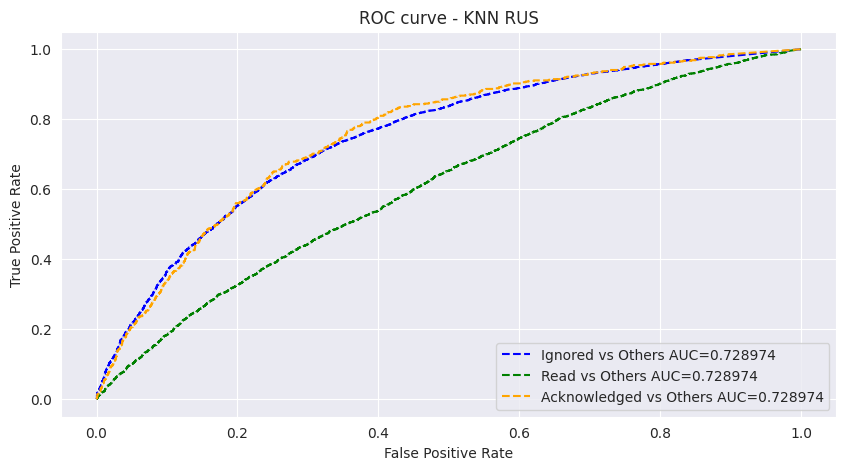

In [ ]:
# Model - knn classifier for RUS
knn_rus = KNeighborsClassifier()
parameters = {'n_neighbors':[15],                               #5, 10],
              'weights':['distance'],                           #,'uniform'],
              'metric':['minkowski'],                           #'euclidean','manhattan'],
              'leaf_size':[10]}                                 #,20, 30]}
# train data with knn on random undersampling
knn_rus = RandomizedSearchCV(knn_rus, parameters, cv=5, n_iter=10)
knn_rus.fit(X_train_rus, y_train_rus)

# model evaluation
model_evaluation = metrices(knn_rus, X_train_rus, y_train_rus, X_test, y_test, 'KNN RUS')


Metrics of KNN SMOTE
Training Data            |        Test Data
Accuracy  : 99.948 %     |     Accuracy  : 61.379 %
Precision : 99.948 %     |     Precision : 74.79 %
Recall    : 99.948 %     |     Recall    : 61.379 %
F1 Score  : 99.948 %     |     F1 Score  : 66.53 %
ROC AUC   : 1.0 %      |     ROC AUC   : 0.677%

Confusion matrix for train data: 
[[41190    37     9]
 [    0 41153    18]
 [    0     0 41163]]

Confusion matrix for test data: 
[[9257 1110  178]
 [3152 1080  243]
 [1342  575  152]]



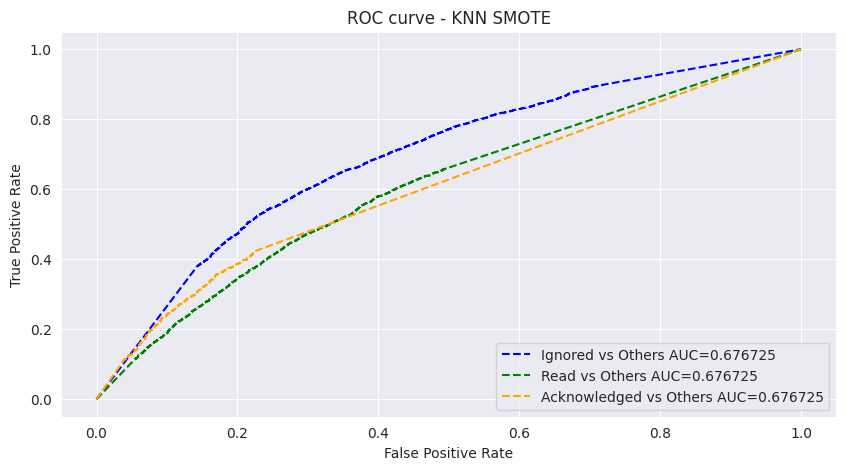

In [ ]:
# Model - knn classifier for SMOTE
knn_smote = KNeighborsClassifier()
parameters = {'n_neighbors':[5],                                #10, 5],
              'weights':['distance'],                           #,'uniform'],
              'metric':['manhattan'],                           #'minkowski', 'euclidean'],
              'leaf_size':[10]}                                 #,20, 30]}
# train data with knn on random undersampling
knn_smote = RandomizedSearchCV(knn_smote, parameters, cv=5, n_iter=10)
knn_smote.fit(X_train_smote, y_train_smote)

# model evaluation
model_evaluation = metrices(knn_smote, X_train_smote, y_train_smote, X_test, y_test, 'KNN SMOTE')

**Observation**: From both the results, oversampling and undersampling data, we can see that the madel is performing well on train data but not on test data.

##**Model explanations using Shap**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
score_df = pd.DataFrame.from_dict(All_metrics, orient='index',columns=Model_names)
model_scores_matrix = score_df.T.reset_index().rename(columns = {"index": 'models'})
model_scores_matrix

,models,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1_Score,Test_F1_Score,Train_ROC_AUC,Test_ROC_AUC
0,Logistic Regression RUS,53.185185,61.741471,51.701452,77.145531,53.185185,61.741471,50.890472,67.598873,0.718064,0.759741
1,Logistic Regression SMOTE,53.756575,61.583475,52.459540,77.246182,53.756575,61.583475,51.136231,67.509555,0.721707,0.761388
2,Decision Tree RUS,49.888889,66.516473,48.068169,73.746712,49.888889,66.516473,41.574127,68.053260,0.653694,0.664697
3,Decision Tree SMOTE,57.703326,64.216748,56.884690,78.484402,57.703326,64.216748,56.600143,69.841604,0.761135,0.742830
4,Random Forest RUS,61.981481,63.912458,62.648443,77.615154,61.981481,63.912458,60.596596,69.215672,0.820152,0.765791
5,Random Forest SMOTE,61.200939,67.955995,60.370191,77.668309,61.200939,67.955995,59.548089,71.939537,0.799350,0.767692
6,XG Boost RUS,81.222222,61.589326,81.807086,77.687958,81.222222,61.589326,81.140345,67.691222,0.946335,0.756316
7,XG Boost SMOTE,82.057134,78.647083,82.240023,75.788640,82.057134,78.647083,81.482746,76.926963,0.941613,0.771495
8,KNN RUS,99.944444,56.896249,99.944537,77.461406,99.944444,56.896249,99.944444,64.125781,1.000000,0.728974
9,KNN SMOTE,99.948207,61.378665,99.948242,74.789700,99.948207,61.378665,99.948209,66.530309,1.000000,0.676725


<Axes: xlabel='Test_F1_Score', ylabel='models'>

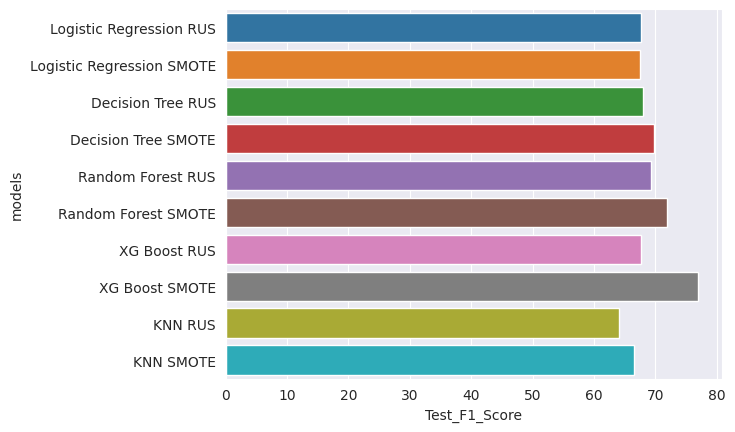

In [ ]:
sns.barplot(y=model_scores_matrix['models'], x=model_scores_matrix['Test_F1_Score'])

**Observation:**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

<Axes: xlabel='Test_ROC_AUC', ylabel='models'>

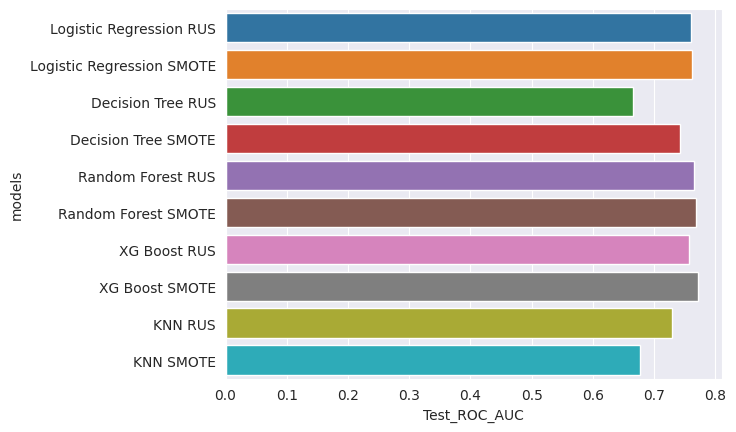

In [ ]:
sns.barplot(y=model_scores_matrix['models'], x=model_scores_matrix['Test_ROC_AUC'])

From all the models, choosing **XG Boost Classifier** with hyperparameter tuning alonng with SMOTE sampling technique as best model as it is giving the highest scores compared to other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Feature importance:**

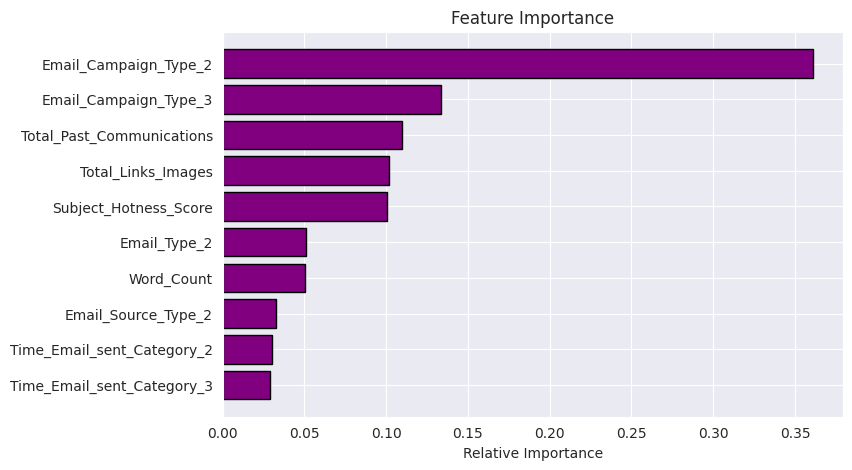

In [ ]:
best = xgb_smote.best_estimator_
features = X.columns
importances = best.feature_importances_[0:10]
indices = np.argsort(importances)
plt.figure(figsize=(8,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='purple',edgecolor='black' ,align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Model Explainability using Shap**

In [ ]:
exp = shap.Explainer(xgb_smote.best_estimator_, shap.sample(X_train, 50), feature_names=x_train.columns)

In [ ]:
shap_values = exp.shap_values(shap.sample(X_test, 100))
classnames = ['ignored', 'read', 'ackowledged']

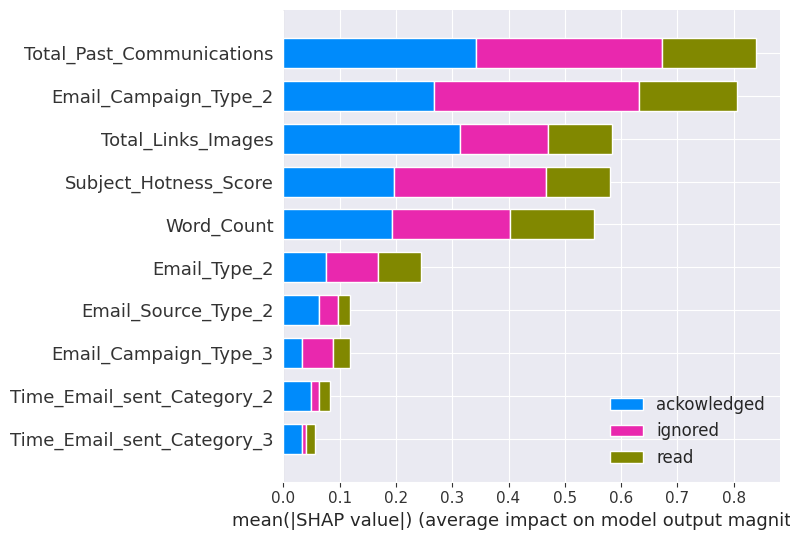

In [ ]:
shap.summary_plot(shap_values, shap.sample(X_test,100), feature_names = X.columns, class_names = classnames)

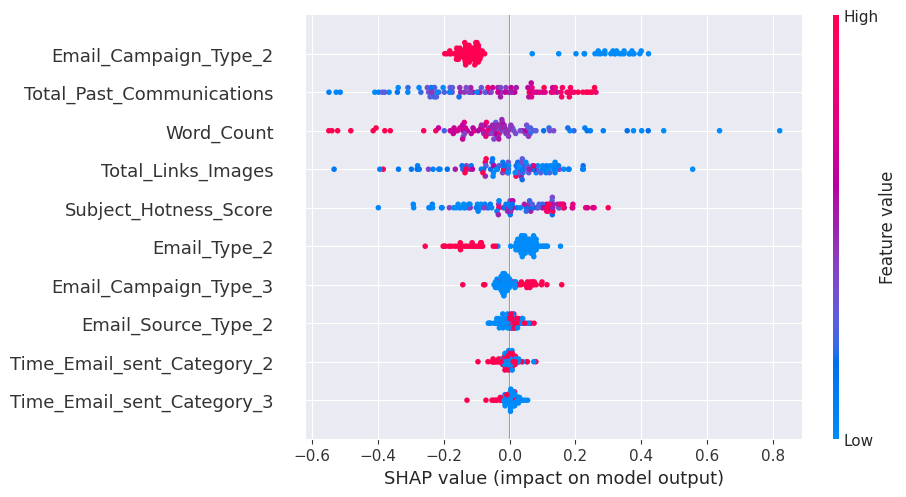

In [ ]:
shap_values_ = exp(shap.sample(X_test, 100))
shap.plots.beeswarm(shap_values_[:,:,1])

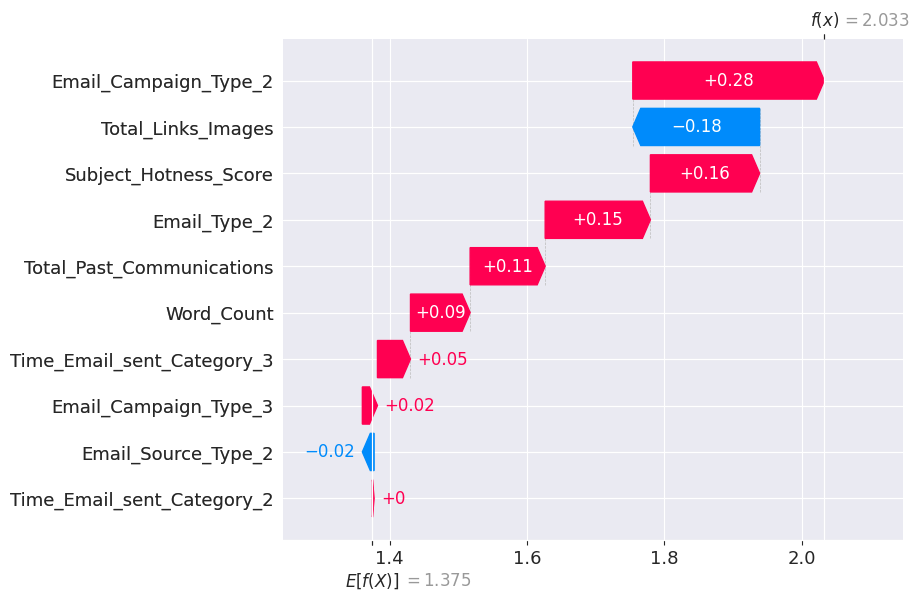

In [ ]:
#shap.waterfall_plot(shap_values)

shap.waterfall_plot(shap.Explanation(values=shap_values[0][8,:], base_values=exp.expected_value[0], feature_names = X.columns))


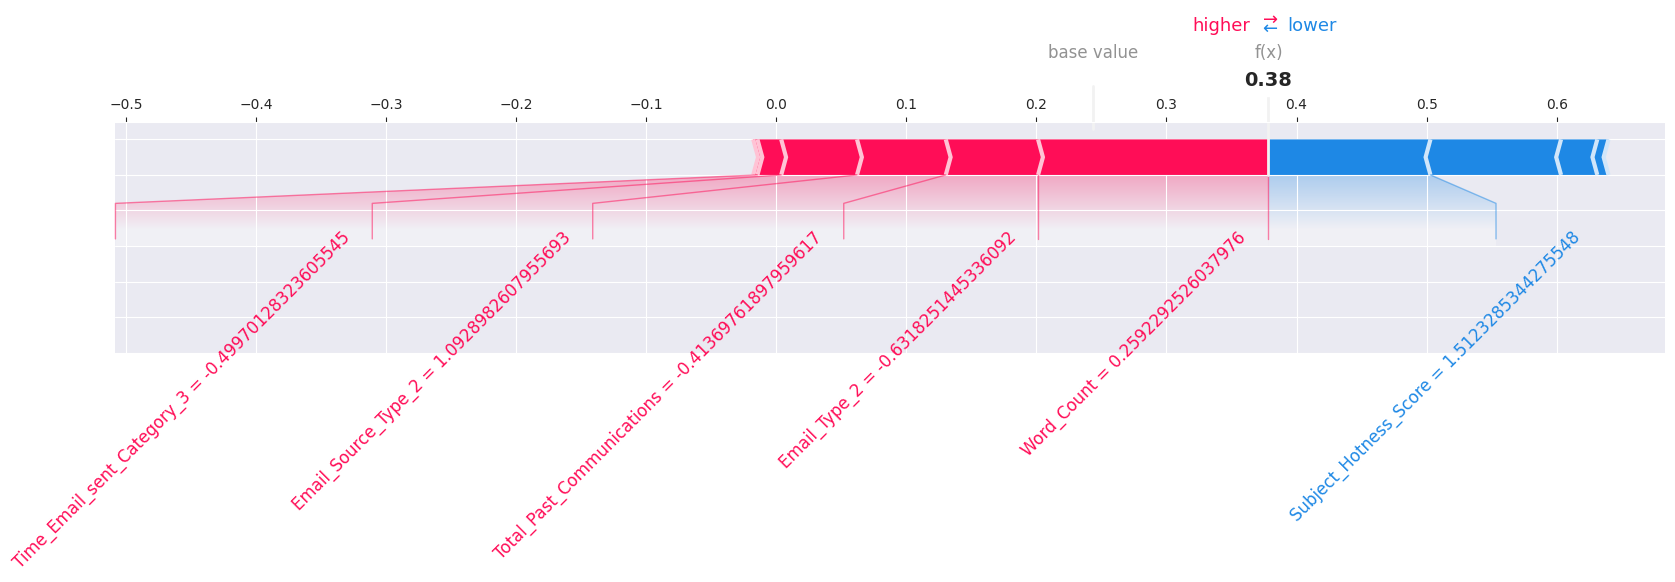

In [ ]:
shap.initjs()
shap.force_plot(exp.expected_value[1], shap_values[1][60], X_test[60], matplotlib=True, feature_names=x_test.columns, text_rotation = 45)

# **Conclusion**

*   From EDA, we can coclude that Email_Campaign_Type is most important feature, with type 1 having above 60% of chance of getting emails read/acknowledged.

*   Irrespective of the customer location, the percentage ratio of emails being ignored, read and acknowledged are mostly similar, dropping this feature will not effect the analysis.

*   As word count increases beyond 600-800 words the chance of email getting read decreases, indicating people's less interest in reading longer emails.

*   Most of the images and links were found in the ignored emails.

*   There are outliers in all the features except Word_Count, however, ignred the outliers as they makeup more that 5% of the minority data and influence the results.

*   From the Total_Past_Communications analysis, we can see that more number of past communications leads to chances of emails getting read/acknowledged.

*   For modelling, it is observed that oversampled data using SMOTE worked better than Random Undersampled data. It could be due to loss of information caused by undersampling technique.

*   Based on the metrics, XGBoost Classifier model worked the best, giving a train score of 82% and test score of 76.9% for F1 score.

*   As per XGBoost Classifier, Total_Past_Caomunications, Email_Camaign_Type, Total_Links, Total_Images, Subject_Hotness_Score are the most important features. 





### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***